### Industrial safety. NLP based Chatbot

## **NLP Chatbot**

• **DOMAIN:** Industrial safety. NLP based Chatbot.

• **CONTEXT:** The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the 
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

• **DATA DESCRIPTION:**
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an 
occurrence of an accident.

**Columns description:** 
- Data: timestamp or time/date information
- Countries: which country the accident occurred (anonymised)
- Local: the city where the manufacturing plant is located (anonymised)
- Industry sector: which sector the plant belongs to
- Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
- Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors 
involved in the accident)
- Genre: if the person is male of female
- Employee or Third Party: if the injured person is an employee or a third party
- Critical Risk: some description of the risk involved in the accident
- Description: Detailed description of how the accident happened.

Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database [ for your reference only ]

• **PROJECT OBJECTIVE:**
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

In [6]:
import plotly
print(plotly.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
# Basic packages
import seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint

# Models
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from wordcloud import WordCloud, STOPWORDS

5.5.0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string
from nltk.tokenize import RegexpTokenizer
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

# nltk downloaded (run only once)
nltk.download('stopwords',quiet=True) # stopword library
nltk.download('wordnet', quiet=True) # wordnet library
nltk.download('words', quiet=True) # words library
nltk.download('punkt', quiet=True) # tokenize library

True

In [10]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from IPython.display import Image
import textwrap
from wordcloud import WordCloud
import missingno as msno
import pickle
from scipy.stats import randint as sp_randint
import time

In [12]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import sys
import subprocess
import pkg_resources

required = {'contractions','spacy_langdetect'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)

In [14]:
from spacy_langdetect import LanguageDetector
import spacy

import string
import contractions
import regex as re
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer 

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [15]:
from google.colab import drive
drive.mount('/content/drive/')
incidents_data_df = pd.read_csv("/content/drive/My Drive//GL-AI-ML/industrial_safety_and_health_database_with_accidents_description.csv")
incidents_data_df.head()

Mounted at /content/drive/


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [16]:
incidents_data_df.drop("Unnamed: 0", axis=1, inplace=True)
incidents_data_df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
incidents_data_df.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [17]:
incidents_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Country                   425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee type             425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [18]:
incidents_data_df.shape

(425, 10)

In [19]:
incidents_data_df.describe()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
count,425,425,425,425,425,425,425,425,425,425
unique,287,3,12,3,5,6,2,3,33,411
top,2017-02-08 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,During the activity of chuteo of ore in hopper...
freq,6,251,90,241,316,143,403,189,232,3


In [20]:
columns = incidents_data_df[incidents_data_df.columns[~incidents_data_df.columns.isin(['Description', 'Unnamed: 0', 'Data'])]].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{incidents_data_df[cols].unique()}\n')

Unique values for Date is 
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00' '2016-03-05 00:00:00'
 '2016-03-06 00:00:00' '2016-03-09 00:00:00' '2016-03-11 00:00:00'
 '2016-03-13 00:00:00' '2016-03-12 

In [21]:
if incidents_data_df.duplicated().sum() > 0:
  print("There are {} duplicate entries".format(incidents_data_df.duplicated().sum()))
  duplicates = incidents_data_df.duplicated()
  print(duplicates)
  incidents_data_df.drop_duplicates(inplace=True, ignore_index=True)
  print(incidents_data_df.shape)

There are 7 duplicate entries
0      False
1      False
2      False
3      False
4      False
       ...  
420    False
421    False
422    False
423    False
424    False
Length: 425, dtype: bool
(418, 10)


In [22]:
replace_struc = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
incidents_data_df['Local'] = incidents_data_df['Local'].map(replace_struc)
replace_struc = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5}
incidents_data_df['Accident Level'] = incidents_data_df['Accident Level'].map(replace_struc)
replace_struc = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
incidents_data_df['Potential Accident Level'] = incidents_data_df['Potential Accident Level'].map(replace_struc)
del replace_struc

In [23]:
incidents_data_df.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,1,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,2,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,3,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,4,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [24]:
incidents_data_df.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

In [25]:
incidents_data_df['Date'] = pd.to_datetime(incidents_data_df['Date'])
incidents_data_df['Year'] = incidents_data_df['Date'].apply(lambda x : x.year)
incidents_data_df['Month'] = incidents_data_df['Date'].apply(lambda x : x.month)
incidents_data_df['Day'] = incidents_data_df['Date'].apply(lambda x : x.day)
incidents_data_df['Weekday'] = incidents_data_df['Date'].apply(lambda x : x.day_name())
incidents_data_df['WeekofYear'] = incidents_data_df['Date'].apply(lambda x : x.weekofyear)
incidents_data_df.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,1,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-01-02,Country_02,2,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53
2,2016-01-06,Country_01,3,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1
3,2016-01-08,Country_01,4,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1


In [26]:
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

incidents_data_df['Season'] = incidents_data_df['Month'].apply(month2seasons)
incidents_data_df.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,Country_01,1,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
1,2016-01-02,Country_02,2,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer
2,2016-01-06,Country_01,3,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer
3,2016-01-08,Country_01,4,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,Summer
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,Summer


In [27]:
def to_Cat(datframeCol):
  return datframeCol.astype('category')

In [28]:
dfCol = incidents_data_df.columns.drop(['Description','Date','Year', 'Month', 'Day','WeekofYear'])
for col in dfCol:
  incidents_data_df[col] = to_Cat(incidents_data_df[col])

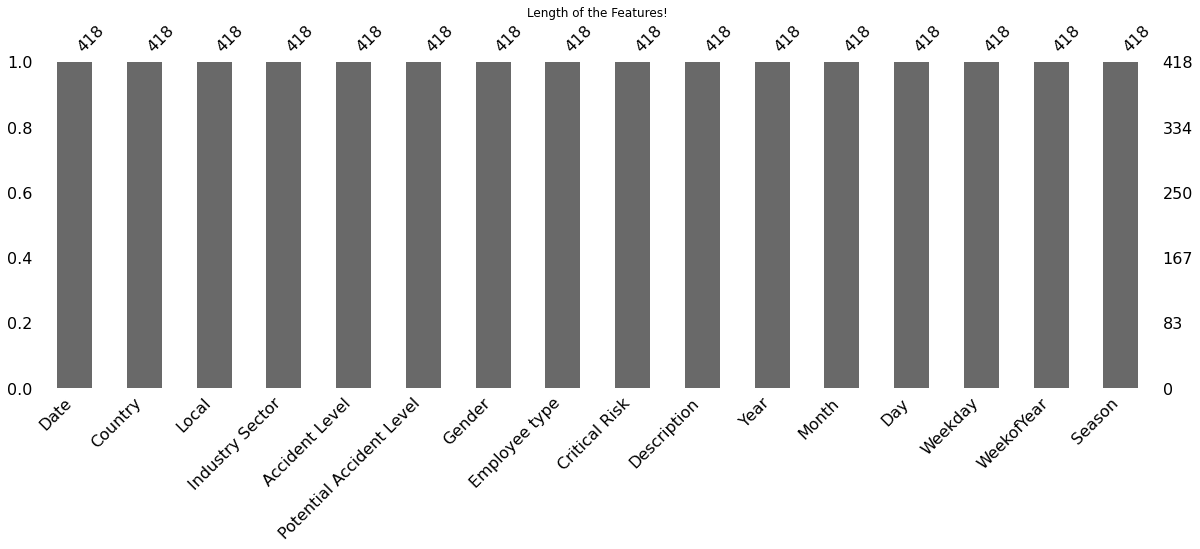

In [29]:
msno.bar(incidents_data_df, figsize = (20, 6))
plt.title("Length of the Features!")
plt.show()

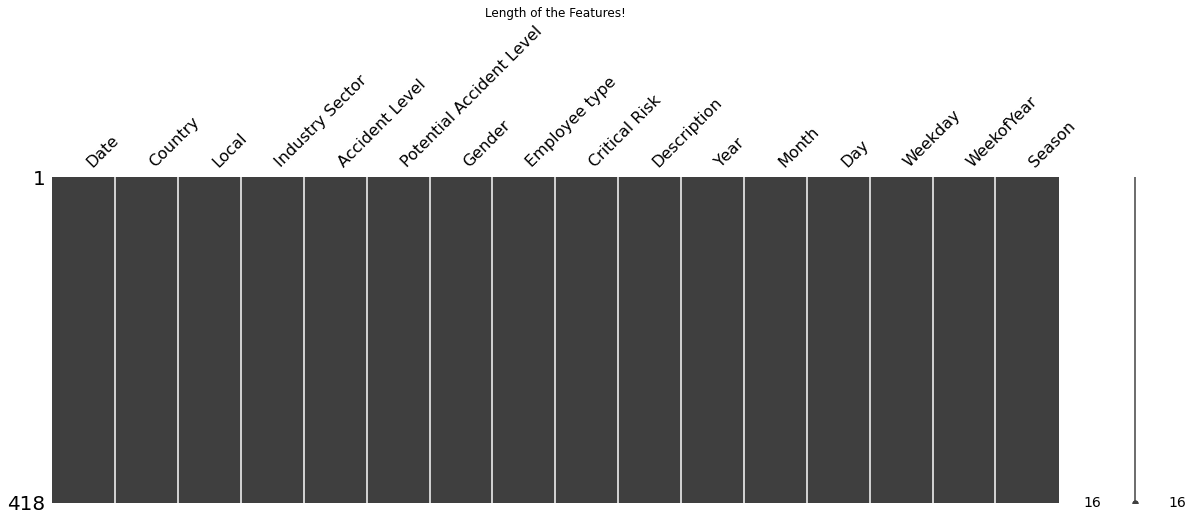

In [30]:
msno.matrix(incidents_data_df, figsize = (20, 6))
plt.title("Length of the Features!")
plt.show()

In [31]:
def pltCnt(pdf, col, axis, indx):
  if indx >= 0:
    ax=sns.countplot(data=pdf,x=col, ax=axis[indx], order=pdf[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set(title=col)
  else:
    ax=sns.countplot(data=pdf,x=col, order=pdf[col].value_counts().index, ax=axis)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set(title=col)
  print("\n")

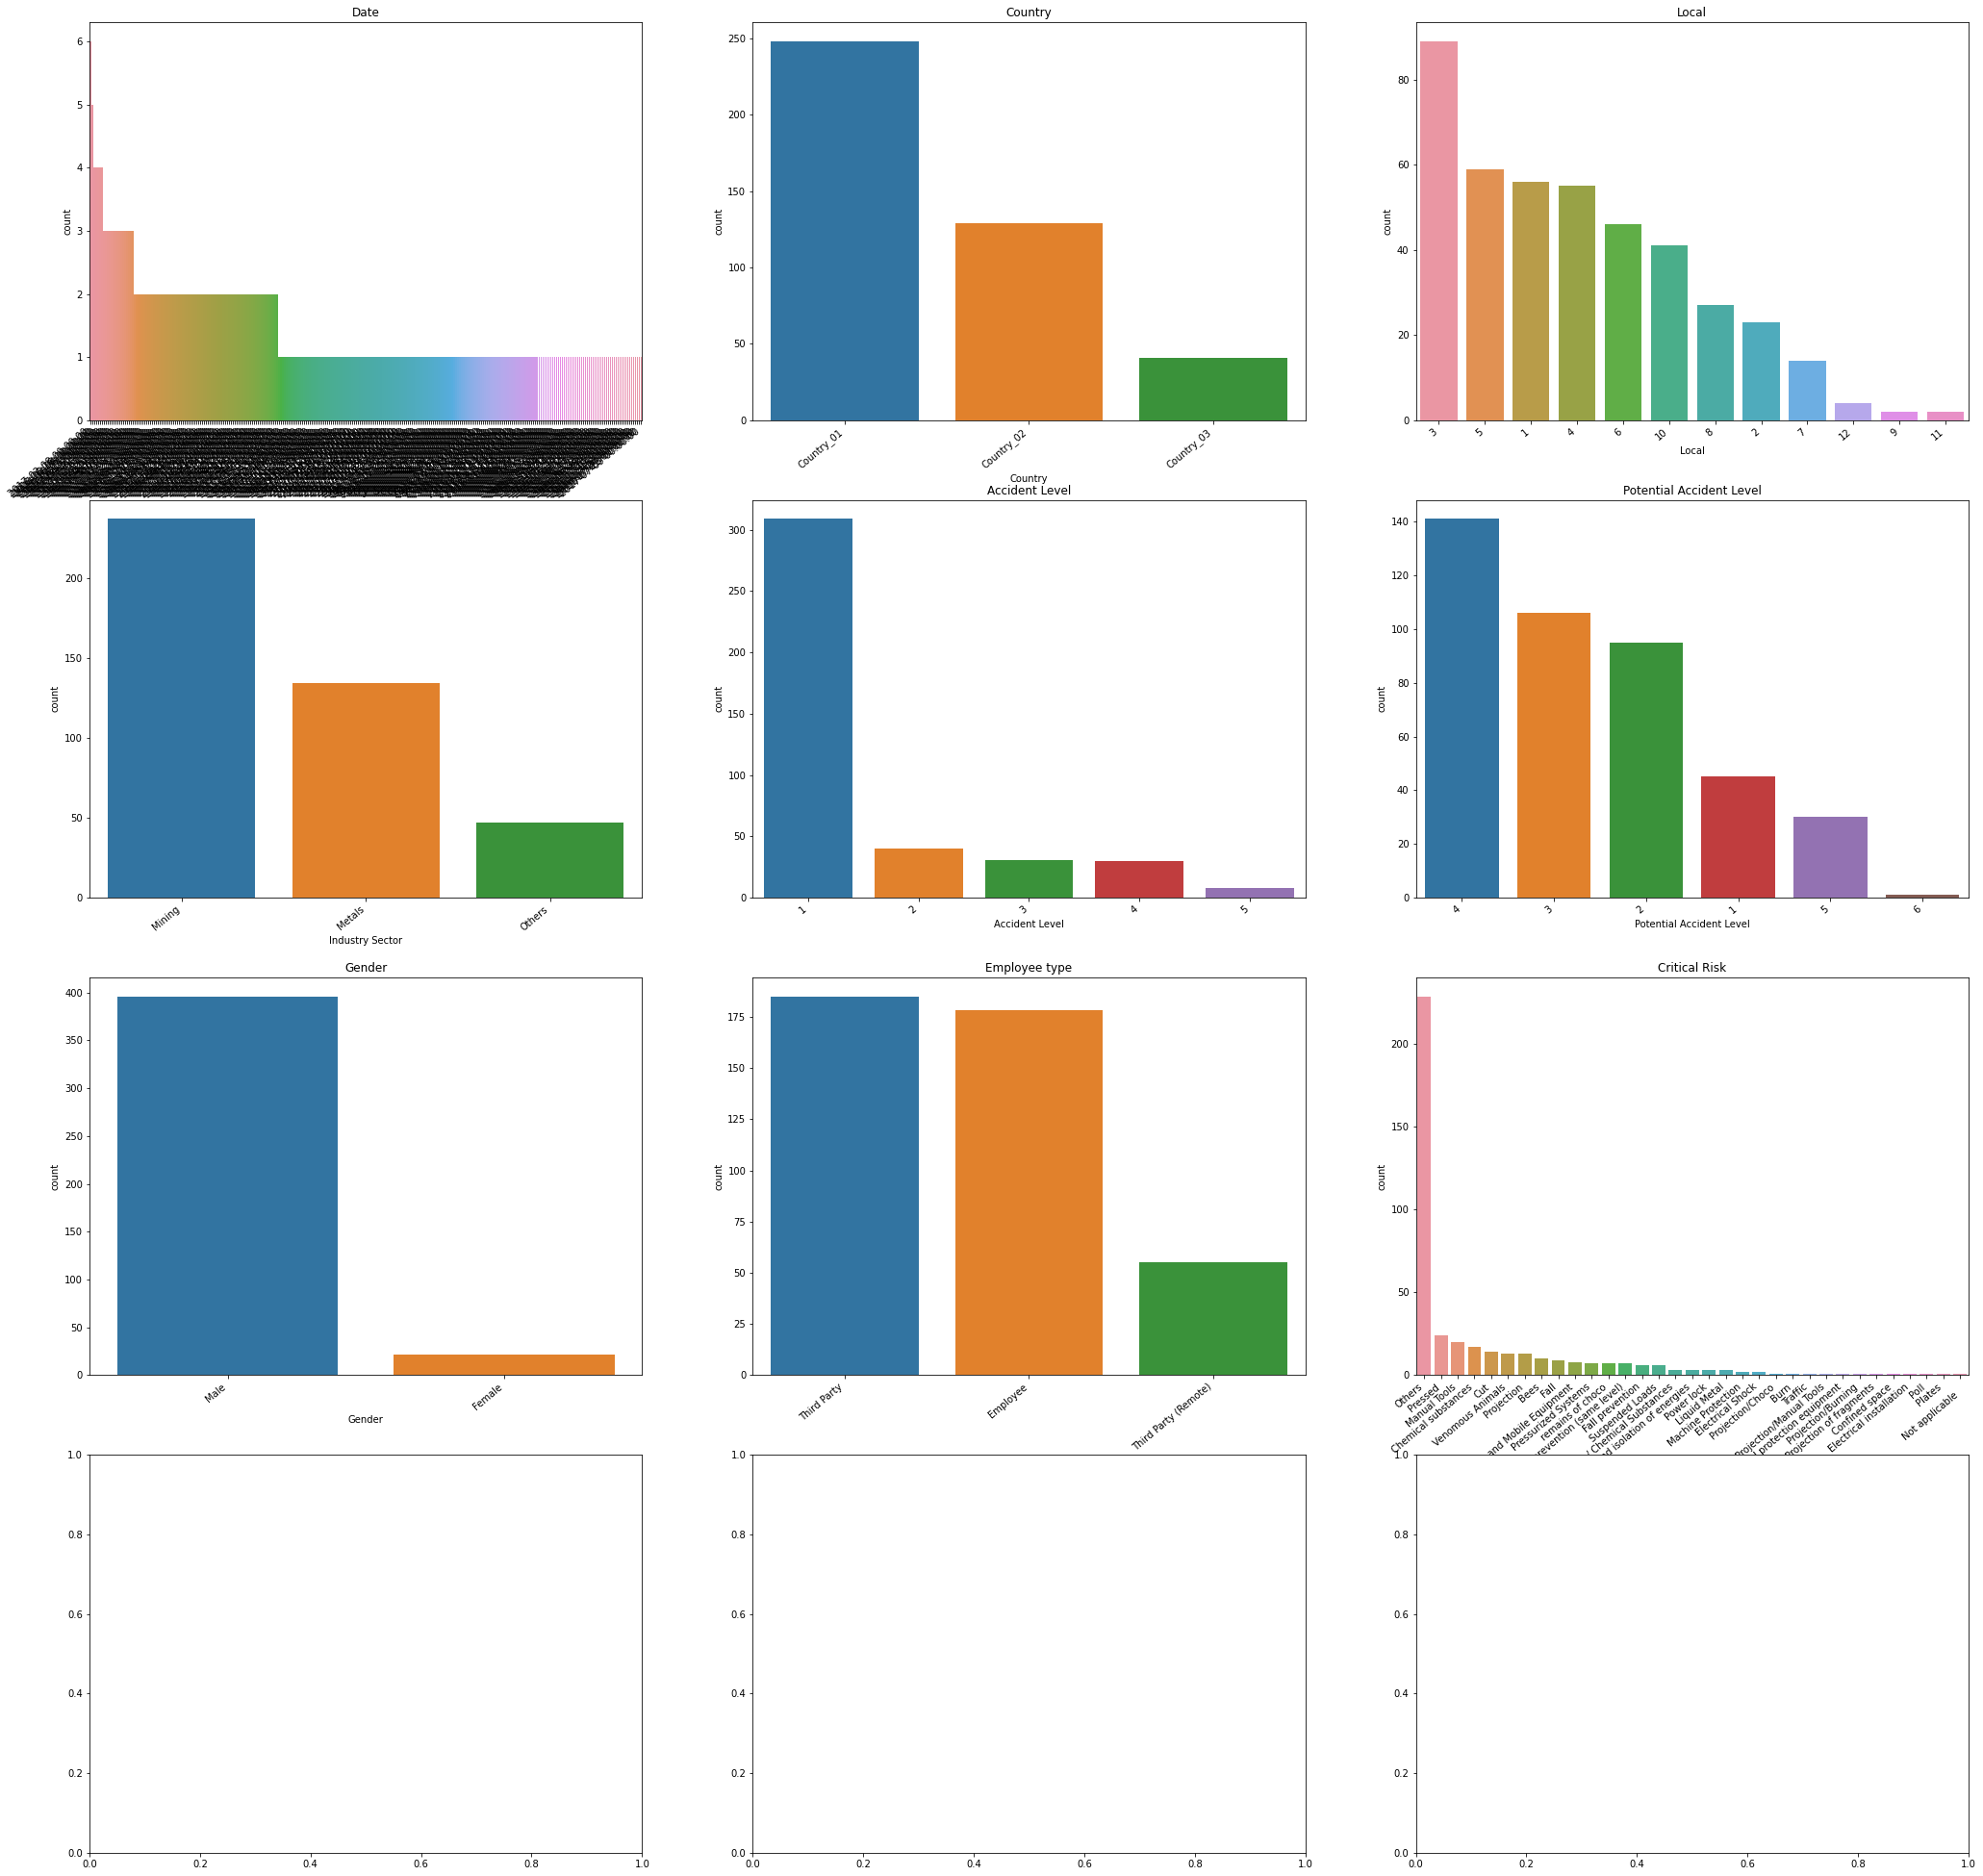

In [32]:
fig,(ax1,ax2, ax3, ax4)=plt.subplots(4,3,figsize=(35,35))
row=1
colIndex=0

for col in columns:
  
  if row == 1:
    pltCnt(incidents_data_df, col, ax1, colIndex)
  elif row == 2:
    pltCnt(incidents_data_df, col, ax2, colIndex)
  elif row == 3: 
    pltCnt(incidents_data_df, col, ax3, colIndex)
  elif row == 4: 
    pltCnt(incidents_data_df, col, ax4, colIndex)

  if colIndex == 2:
    colIndex = 0
    row = row+1
  else:
    colIndex = colIndex+1

<html>
    <ul style="color:DarkBlue;">
    <li>Country_01,Local_03. Most accidents are in Mining Sector.</li>
    <li>Accidents Level I has most occurance. We may assume that these could be minor accidants.</li>
    <li>The distribution of workforce is imbalanced. There are more Male workers than Females ones.</li>
    <li>More number of accidents are reported for Third party Employees. Remote workers are involved in less accidents.</li>
    <li>Year 2016 has more accidents than Year 2017. This may indicate that some remediations might have been in place to reduce accidents.</li>
    <li>More accidents are reported between January and March. This decreases over the year, thereafter.</li>
    <li>From <a href = https://www.naturalworldsafaris.com/latin-america/brazil/information/should-i-travel-to-brazil-in-rainy-season#:~:text=So%2C%20yes%2C%20in%20Brazil%20it,distinct%20seasons%3A%20wet%20and%20dry> Natural World Safaris</a>, it rains from December to March, which may lead to an assumption that more accidents happen during the rainy season as is evident from data as well.</li>
</ul></html>

**Analysis of attibutes/columns of given dataset**

**Univariate Analysis**

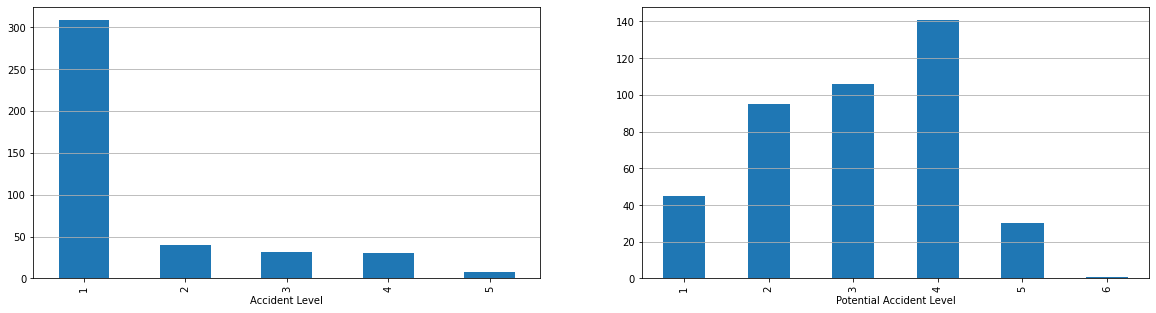

In [33]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
acc_level = "Accident Level"
incidents_data_df[acc_level].reset_index().groupby(acc_level).count().plot(kind="bar", legend=False, 
        ax=ax[0]).grid(axis='y')

pot_acc_level = "Potential Accident Level"
incidents_data_df[pot_acc_level].reset_index().groupby(pot_acc_level).count().plot(kind="bar", legend=False, 
        ax=ax[1]).grid(axis='y')


plt.show()

  Accident level I is the most occured accident level of all the accidents in the dataset.

  Potential Accident level IV is the most occured potential accident level of all the accidents in the dataset.


**Country**

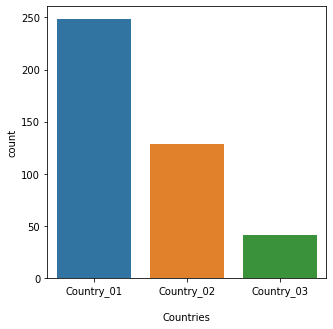

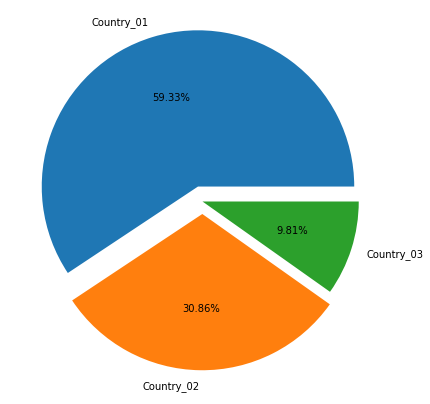

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(x=incidents_data_df['Country'],order=incidents_data_df['Country'].value_counts().index)
plt.xlabel("\nCountries")

plt.figure(figsize=(7,10))
plt.pie(incidents_data_df['Country'].value_counts(), labels=['Country_01','Country_02','Country_03'], explode=(0.1,0.08,0),autopct = '%1.2f%%');

The most affected country from the above dataset is country_01 with around 59% of the accidents.

**Most accidents happened in Country_01 .Its count is 251 ,which is equivalent to 59.06% .**

**Local**

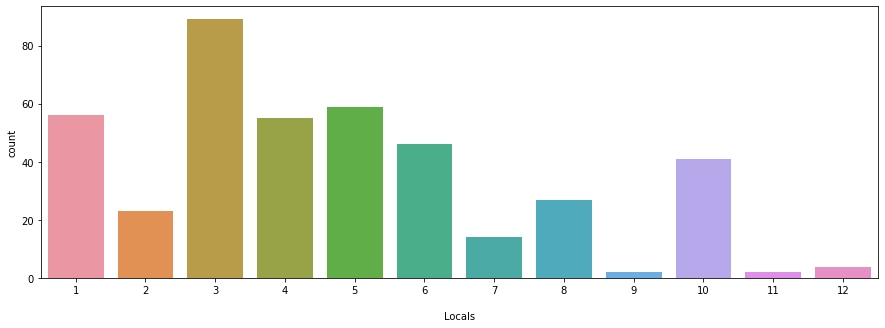

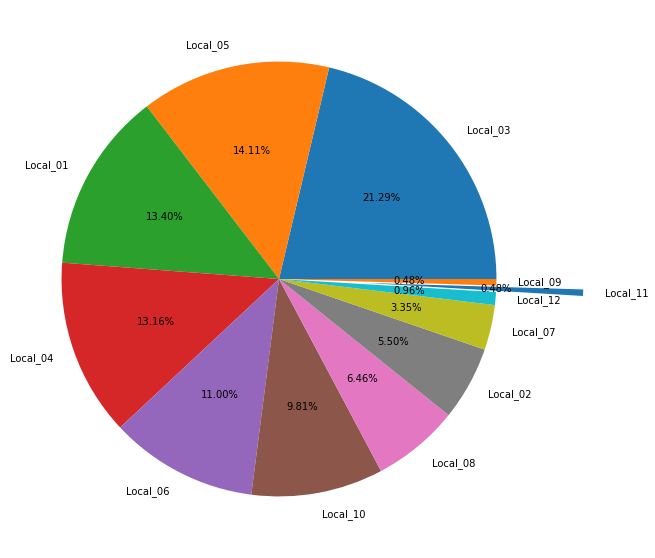

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(x=incidents_data_df['Local'])
plt.xlabel("\nLocals")

plt.figure(figsize=(10,10))
plt.pie(incidents_data_df['Local'].value_counts(), labels=['Local_03','Local_05','Local_01','Local_04','Local_06','Local_10',
                                                'Local_08','Local_02','Local_07','Local_12','Local_11','Local_09'], 
                                                  explode=(0,0,0,0,0,0,0,0,0,0,0.4,0),autopct = '%1.2f%%')
plt.show()

**Most accidents happened in Local_03 .Its count is 90 ,which is equivalent to 21.18% .**

**Industry Sector**

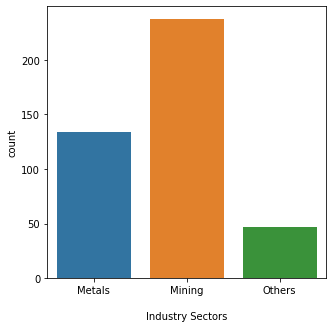

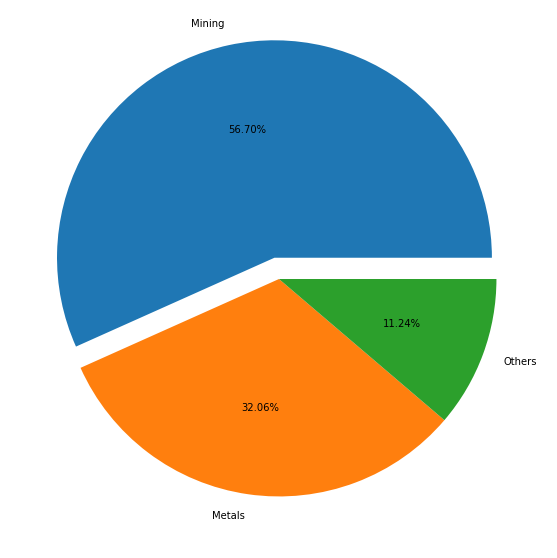

In [36]:
plt.figure(figsize=(5,5))
sns.countplot(x=incidents_data_df['Industry Sector'])
plt.xlabel("\nIndustry Sectors")

plt.figure(figsize=(10,10))
plt.pie(incidents_data_df['Industry Sector'].value_counts(), labels=['Mining', 'Metals', 'Others'], explode=(0.1,0,0),autopct = '%1.2f%%');


Mostly affected sector is Mining sector. 56.71% of accidents occur in Mining sector.

**Most accidents happened in mining Industry sector .Its count is 241 ,which is equivalent to 56.71%.**

**Accident level**

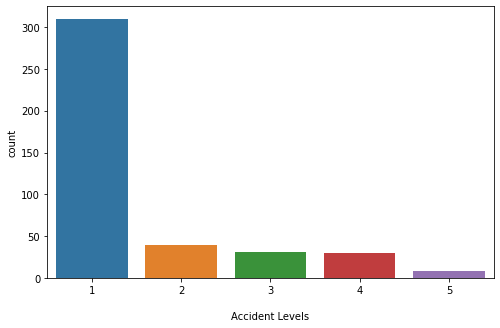

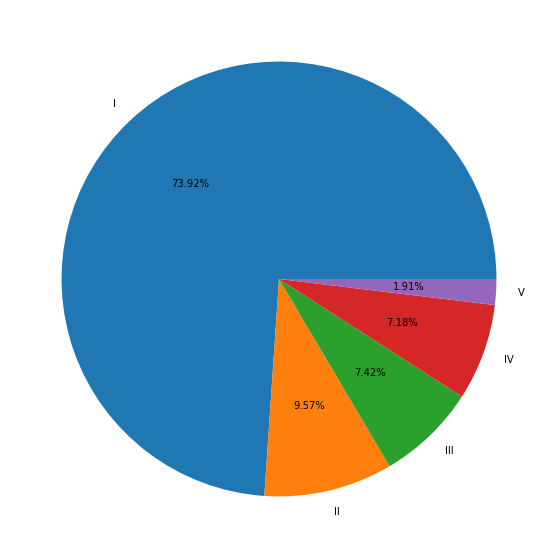

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(x=incidents_data_df['Accident Level'])
plt.xlabel("\nAccident Levels")

plt.figure(figsize=(10,10))
plt.pie(incidents_data_df['Accident Level'].value_counts(), labels=['I', 'II', 'III' ,'IV' ,'V'], explode=(0,0,0,0,0),autopct = '%1.2f%%')
plt.show()

**Most accidents belongs to "Accident Level" I .Its count is 316 which is equivalent to 74.35%% of total accidents.**

**Potential Accident level**

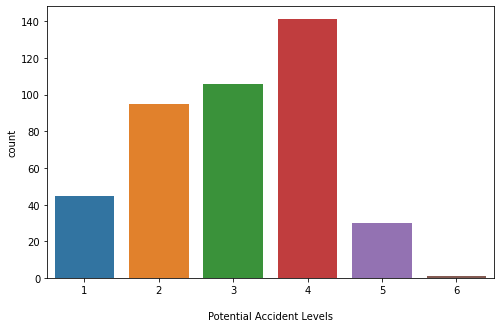

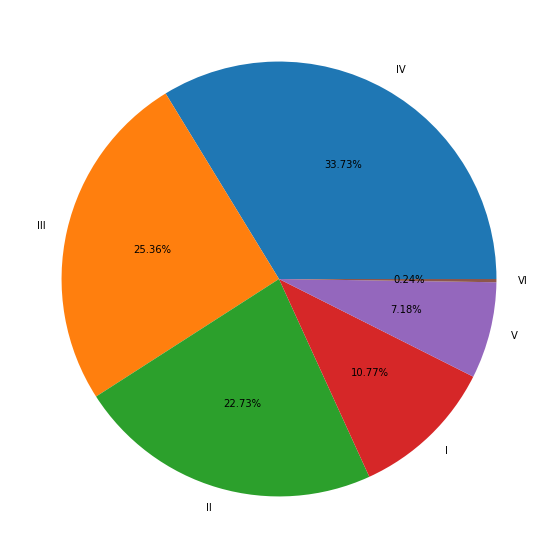

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x=incidents_data_df['Potential Accident Level'])
plt.xlabel("\nPotential Accident Levels")

plt.figure(figsize=(10,10))
plt.pie(incidents_data_df['Potential Accident Level'].value_counts(), labels=['IV','III','II','I','V','VI'], explode=(0,0,0,0,0,0),autopct = '%1.2f%%')
plt.show()

**Most "Potential Accident Level" belongs to level IV .Its count is 143 which is equivalent to 33.65% of total potential accidents.**

**Gender**

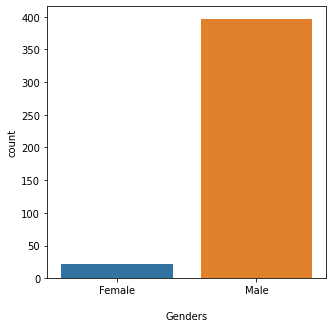

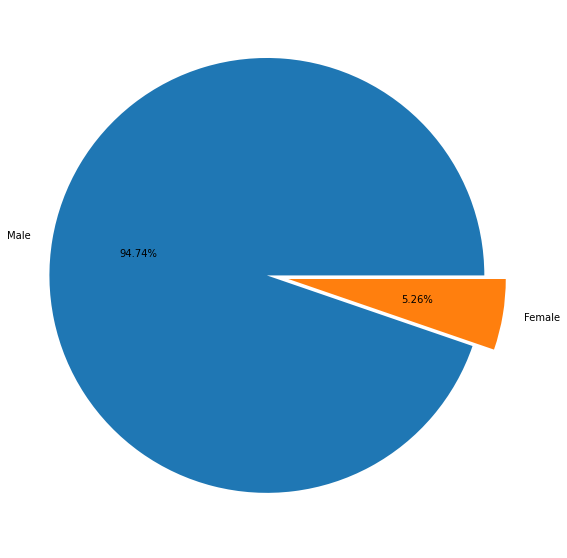

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(x=incidents_data_df['Gender'])
plt.xlabel("\nGenders")

plt.figure(figsize=(10,10))
plt.pie(incidents_data_df['Gender'].value_counts(), labels=['Male', 'Female'], explode=(0.1,0),autopct = '%1.2f%%');


**Most affected wokers in accidents are male .Their count is 403 ,which is equivalent to 94.82%**

**Employee type**

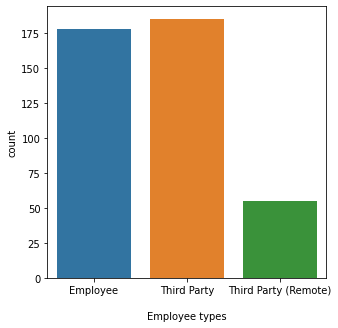

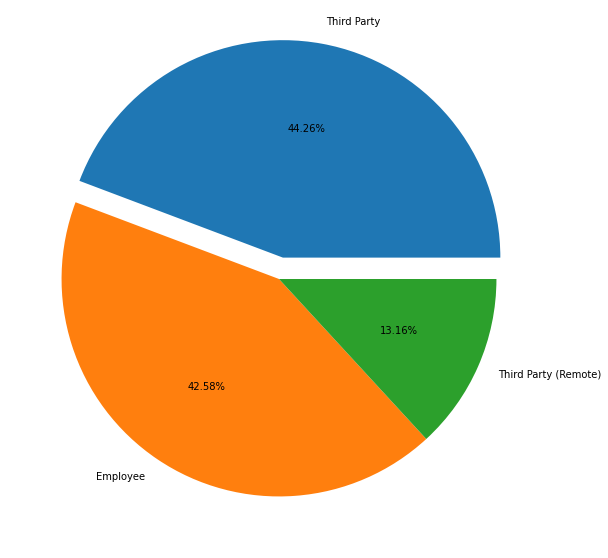

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(x=incidents_data_df['Employee type'])
plt.xlabel("\nEmployee types")

plt.figure(figsize=(10,10))
plt.pie(incidents_data_df['Employee type'].value_counts(), labels=['Third Party', 'Employee', 'Third Party (Remote)'], explode=(0.1,0,0),autopct = '%1.2f%%');

Employee type of Third party is most prone to Accident risk.

**Most affected Employee type are Third party workers .Their count is 189 ,which is equivalent to 44.47%.**

**Critical Risk**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

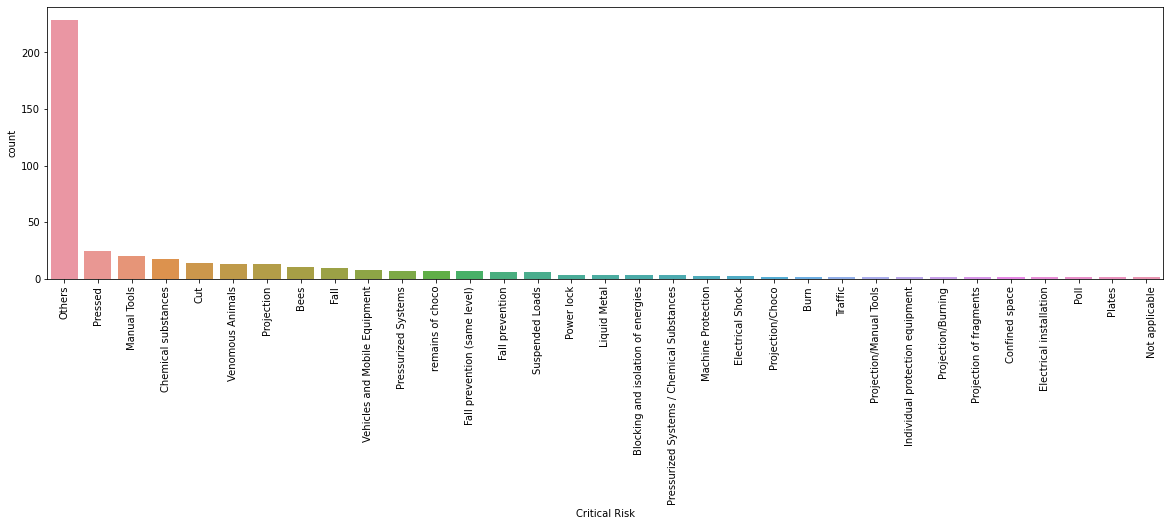

In [41]:
plt.figure(figsize=(20,5))
descending_order = incidents_data_df['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(x=incidents_data_df['Critical Risk'],order=descending_order);
plt.xticks(rotation = 'vertical')

**Risk Factor Analysis:**

When we count the number of incidents by each type of critical risk, **Others** tops the list.

**Year**

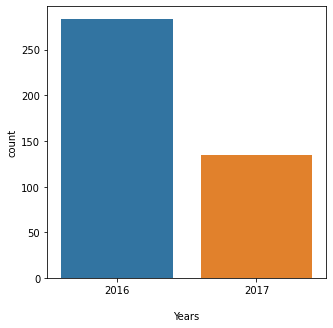

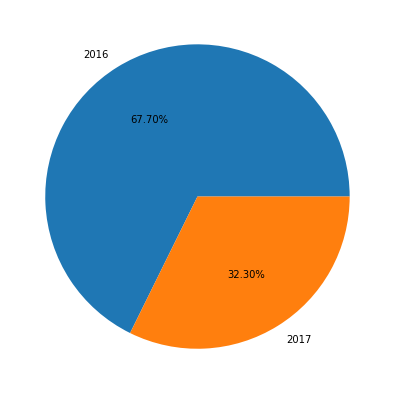

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(x=incidents_data_df['Year'])
plt.xlabel("\nYears")

plt.figure(figsize=(7,7))
plt.pie(incidents_data_df['Year'].value_counts(), labels=['2016', '2017'], explode=(0,0),autopct = '%1.2f%%')

plt.show()

 **Most accidents happend in year 2016.Count is 285 ,which is equivalent to 67.06% .**

**Month**

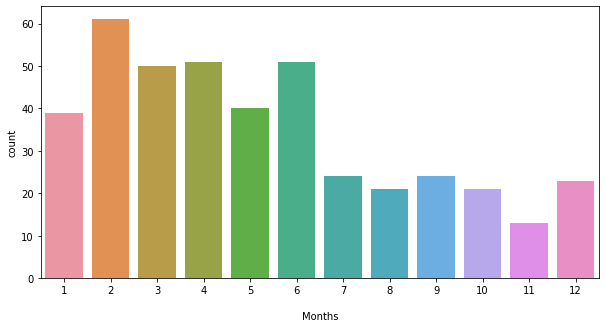

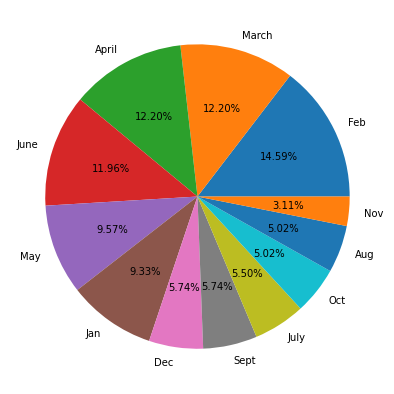

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x=incidents_data_df['Month'])
plt.xlabel("\nMonths")

plt.figure(figsize=(7,7))
plt.pie(incidents_data_df['Month'].value_counts(), labels=['Feb', 'March','April', 'June','May', 'Jan','Dec', 'Sept','July', 'Oct','Aug', 'Nov'], explode=(0,0,0,0,0,0,0,0,0,0,0,0),autopct = '%1.2f%%')

plt.show()

**Most accidents happend in Feb month.Count is 61 ,which is equivalent to 14.35%**

**Weekday**

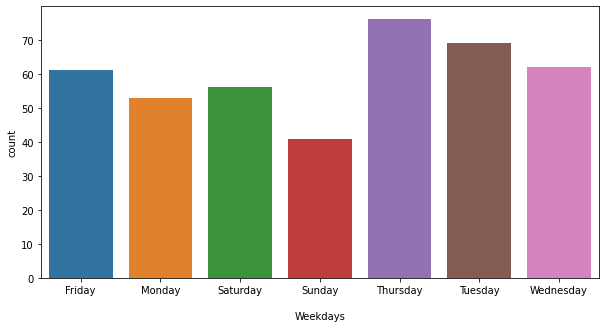

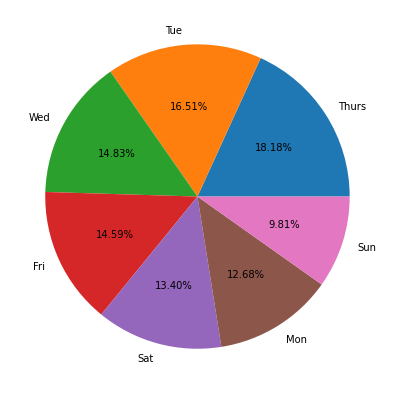

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x=incidents_data_df['Weekday'])
plt.xlabel("\nWeekdays")

plt.figure(figsize=(7,7))
plt.pie(incidents_data_df['Weekday'].value_counts(), labels=['Thurs', 'Tue','Wed', 'Fri','Sat', 'Mon','Sun'], explode=(0,0,0,0,0,0,0),autopct = '%1.2f%%')

plt.show()

**Most accidents happend in Thursday .Count is 79 ,which is equivalent to 18.59%**

In [45]:
def pltCat(data, col, axis, indx, x='Accident Level'):
  if indx >= 0:
    ax=sns.stripplot(data=incidents_data_df,x=x, y=col, ax=axis[indx])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set(title=col)
  else:
    ax=sns.stripplot(data=incidents_data_df,x=x, y=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set(title=col)
  print("\n")

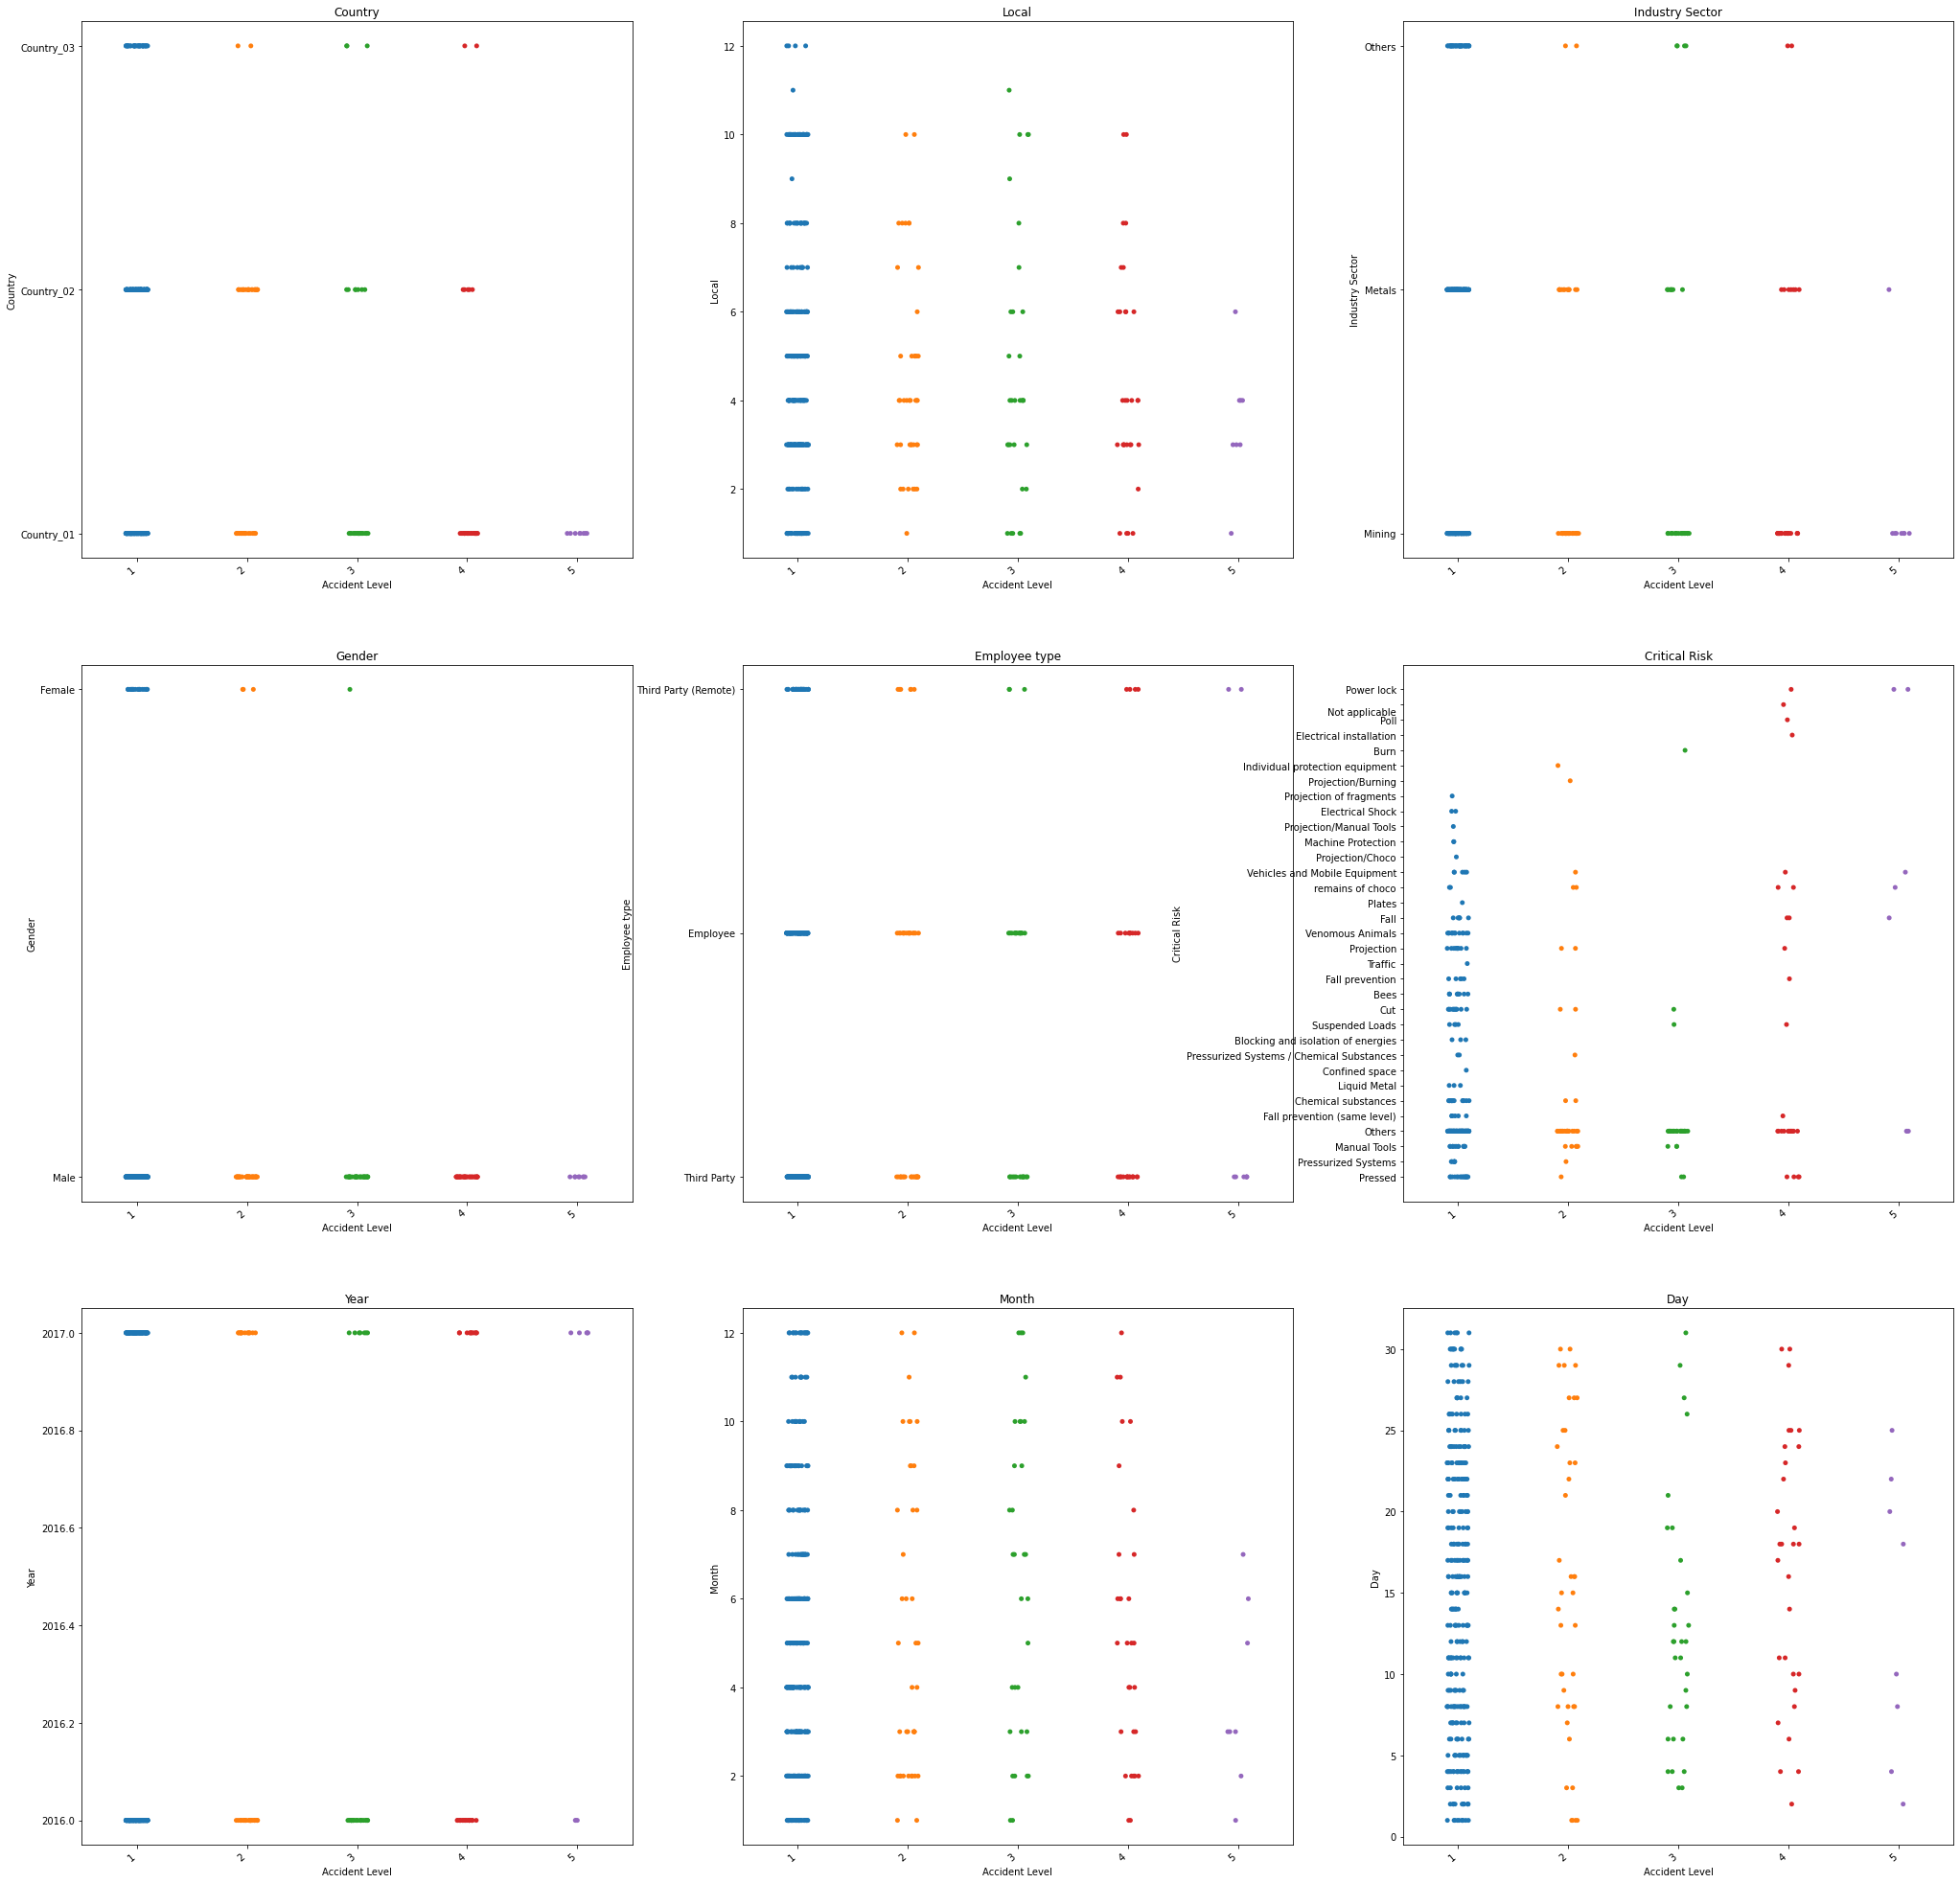

In [46]:
columns=incidents_data_df.columns
columns=columns.drop(['Date','Description','Potential Accident Level','Accident Level'])

fig,(ax1,ax2, ax3)=plt.subplots(3,3,figsize=(35,35))
row=1
colIndex=0


for col in columns:
  
  if row == 1:
    pltCat(incidents_data_df, col, ax1, colIndex)
  elif row == 2:
    pltCat(incidents_data_df, col, ax2, colIndex)
  elif row == 3: 
    pltCat(incidents_data_df, col, ax3, colIndex)
  #elif row == 4: 
   # pltCat(incidents_data_df, col, ax4, colIndex)


  if colIndex == 2:
    colIndex = 0
    row = row+1
  else:
    colIndex = colIndex+1

<p style="color:Blue;"> Observations:</p>
    <ul style="color:Darkblue;">
    <li>Country_01 is the only country that has Accident LeveL V, while manjority of the accidents are at Level I for other countries.</li>
    <li>Local_04 has most number of Level V accidents.</li>
    <li>Most Level V Accidents are in Mining Sector. As we already know that there are heavy rains from December to March, this may also result in hazardous conditions for major accidents in Mining Sector.</li>
    <li>Similarly, in Level V Accidents, only Male workers are involved. This may be because most of the workers in Mining sector comprises of Male as very few female workers work in Mining sector.</li>
    <li> The rainy season in Brazil in December to March and we see level V in January through June.</li>
    <li>Third party employee type has more level V accidents. This may mean that they are not properly trained on safety measures.</li>
    <li>Level I can happen any day in the month, but Level V is beginning or end of the month</li>
</ul>
<br>

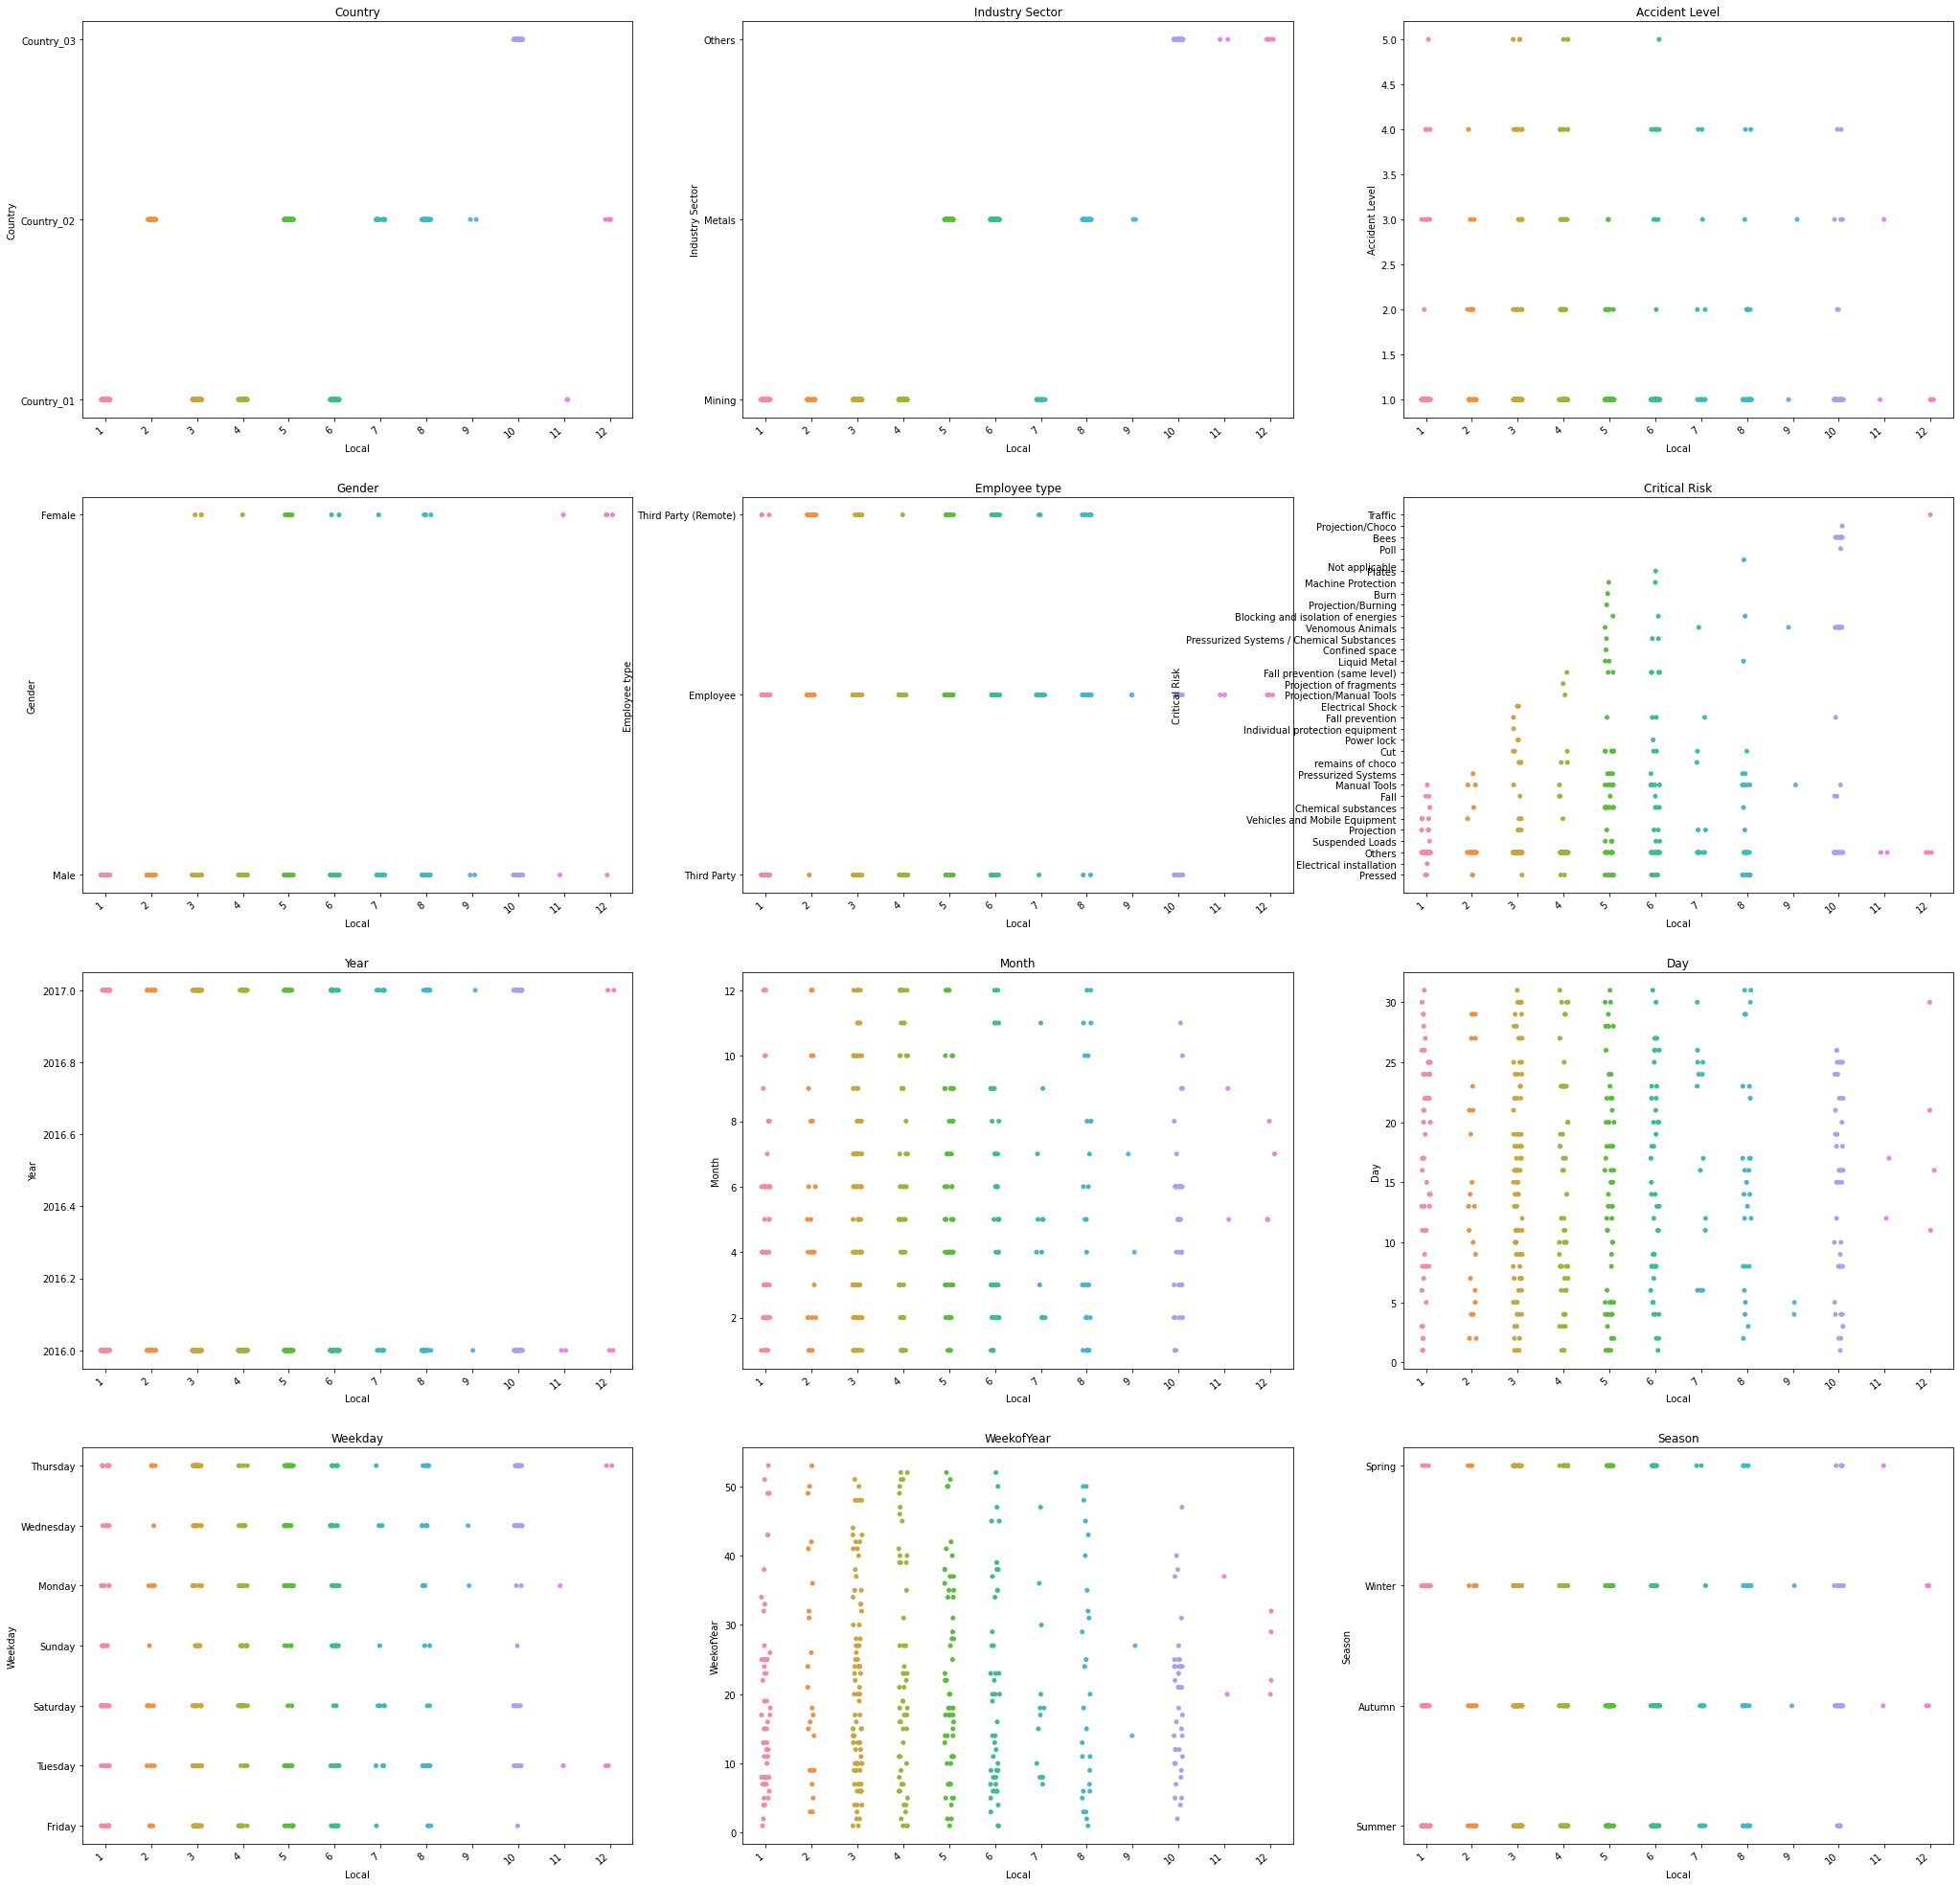

In [47]:
columns=incidents_data_df.columns
columns=columns.drop(['Date','Description','Potential Accident Level','Local'])

fig,(ax1,ax2, ax3, ax4)=plt.subplots(4,3,figsize=(35,35))
row=1
colIndex=0


for col in columns:
  
  if row == 1:
    pltCat(incidents_data_df, col, ax1, colIndex, 'Local')
  elif row == 2:
    pltCat(incidents_data_df, col, ax2, colIndex, 'Local')
  elif row == 3: 
    pltCat(incidents_data_df, col, ax3, colIndex, 'Local')
  elif row == 4: 
    pltCat(incidents_data_df, col, ax4, colIndex, 'Local')


  if colIndex == 2:
    colIndex = 0
    row = row+1
  else:
    colIndex = colIndex+1

<p style="color:Blue;">Observations:</p>
    <ul style="color:Darkblue;">
    <li>Country_02 has maximum number of cities.</li>
    <li>Mining is happening in majority of the cities.</li>
    <li>Most cities have reported occurrence of Accident Level I.</li>
    <li>Large section of workforce comprises of Males.</li>
    <li>LOcal_05 and Local_06 have most variety of Critical Risk.</li>
    <li>Most of the cities have reported accident in the Autumn season.</li>
</ul>
<br>

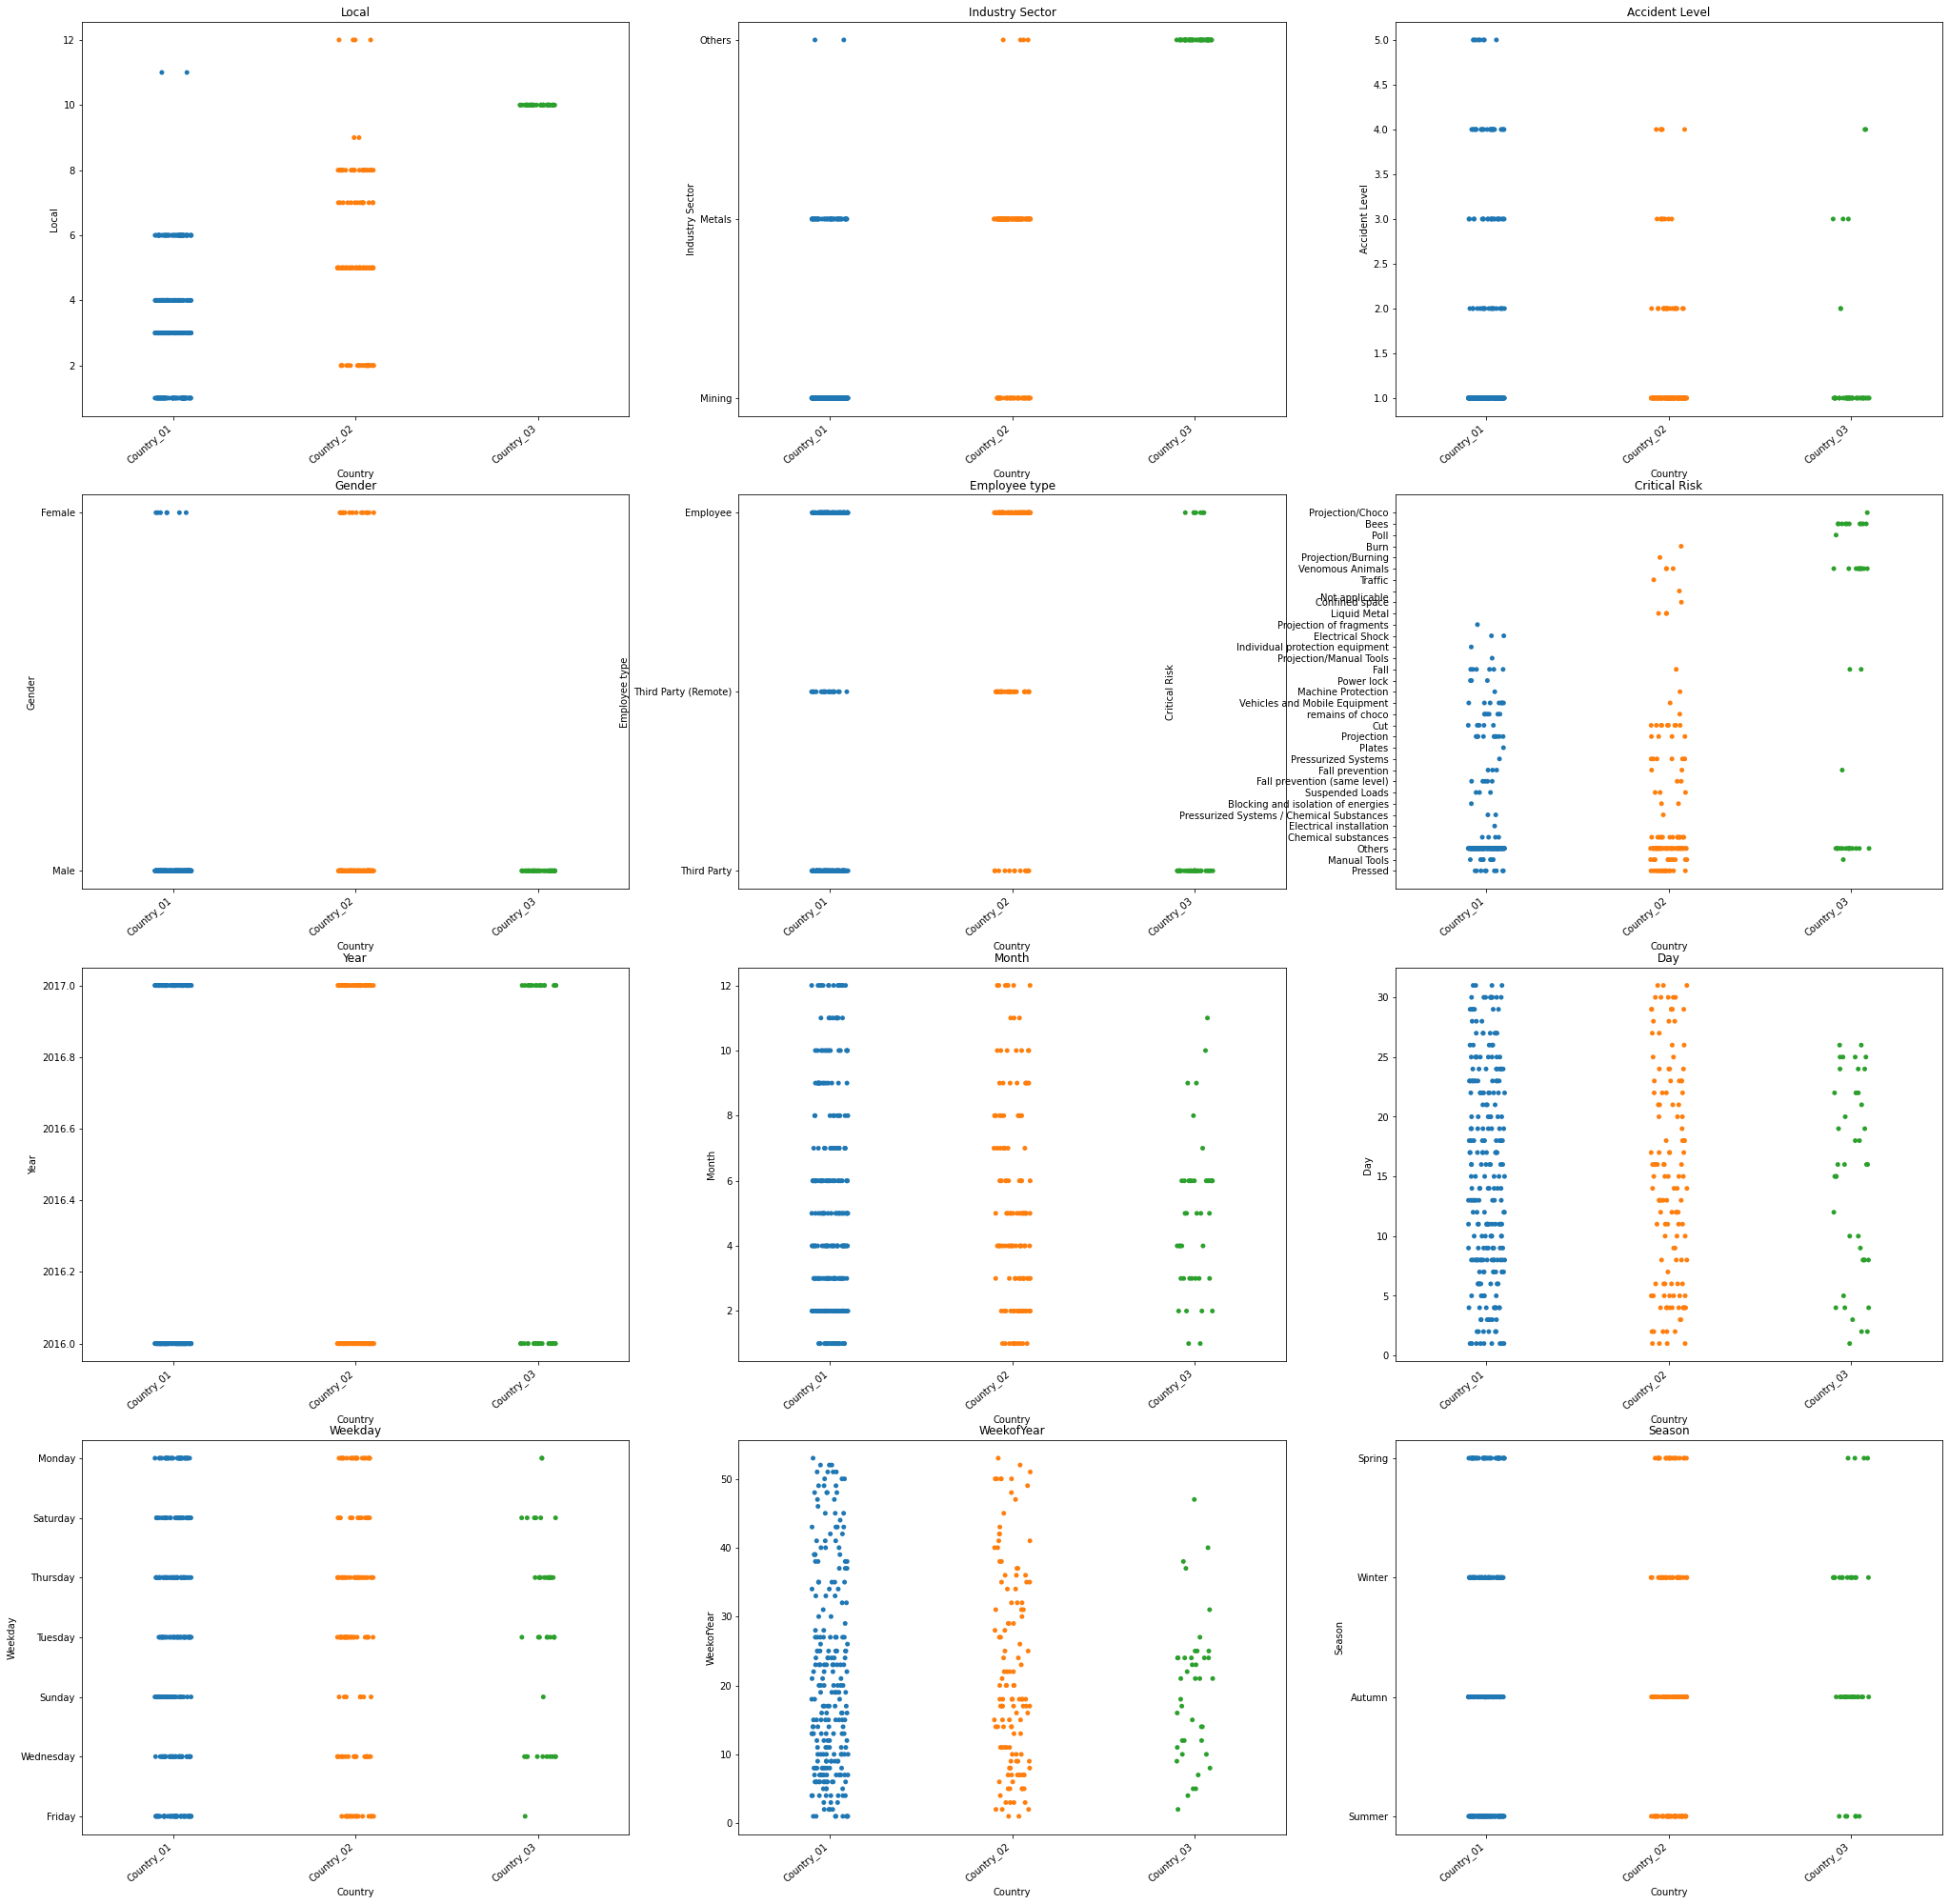

In [48]:
columns=incidents_data_df.columns
columns=columns.drop(['Date','Description','Potential Accident Level','Country'])

fig,(ax1,ax2, ax3, ax4)=plt.subplots(4,3,figsize=(35,35))
row=1
colIndex=0


for col in columns:
  
  if row == 1:
    pltCat(incidents_data_df, col, ax1, colIndex, 'Country')
  elif row == 2:
    pltCat(incidents_data_df, col, ax2, colIndex, 'Country')
  elif row == 3: 
    pltCat(incidents_data_df, col, ax3, colIndex, 'Country')
  elif row == 4: 
    pltCat(incidents_data_df, col, ax4, colIndex, 'Country')


  if colIndex == 2:
    colIndex = 0
    row = row+1
  else:
    colIndex = colIndex+1

<p style="color:Blue;"> <b>Observations:</b></p>
    <ul style="color:Darkblue;">
    <li>Country_01 and Country_02 has most of the Metals and Mining industry.</li>
    <li>Country_01 and Country_02 have reported majority of of the accidents.</li>
    <li>Country_02 has seems to have balanced distribution of employee types.</li>
    <li>Country_01 has morst number of critical risks.</li>
    
</ul>
<br>

**Multivariate Analysis:**

**Analysis of Industry Sector wrt Accident/ Potential Accident Level**

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

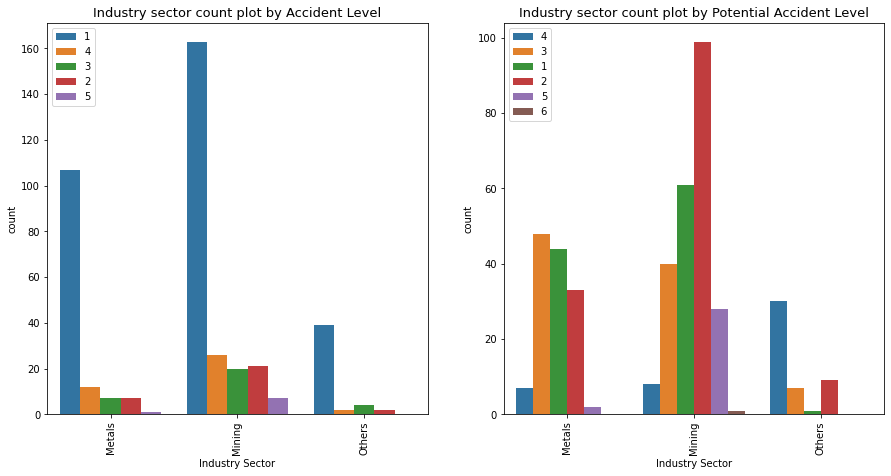

In [49]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Industry Sector', data = incidents_data_df, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title('Industry Sector'.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = incidents_data_df['Accident Level'].unique())
plt.xticks(rotation = 90)
    
ax = fig.add_subplot(122)
sns.countplot(x ='Industry Sector' , data = incidents_data_df, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title('Industry Sector'.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = incidents_data_df['Potential Accident Level'].unique())
plt.xticks(rotation = 90)



#### **Industry Sector Vs Accident Level**
*   **Accident level I is highest in all industry sector (Mining, Metals and Other).**
*   **Most accidents happened in Mining industry sector.**
*   **Others industry sector has less accidents in comparision to other industries.**
*   **There are very few cases for Accident level 5.Others sector didn't reported any case for this level**

#### **Industry Sector Vs Potential Accident Level**
*   **Potential Accident level 4 is highest in all industry sector (Mining, Metals and Others).**
*   **Most accidents happened in Mining industry sector.**
*   **Others industry sector has less accidents in comparision to other industries.**
*   **These are very few cases for Accident level 6.Metals and Others sector didn;t reported case for this accident level**




**Analysis of Country wrt Accident/ Potential Accident Level**

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

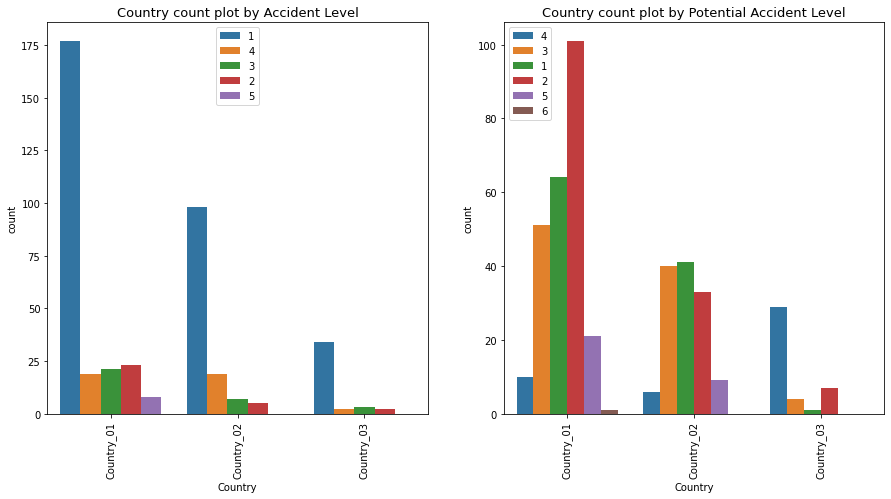

In [50]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Country', data = incidents_data_df, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title('Country'.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = incidents_data_df['Accident Level'].unique())
plt.xticks(rotation = 90)
    
ax = fig.add_subplot(122)
sns.countplot(x ='Country' , data = incidents_data_df, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title('Country'.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = incidents_data_df['Potential Accident Level'].unique())
plt.xticks(rotation = 90)




#### **Country Vs Accident Level**
*   **Accident level I is highest in all countries.**
*   **Most accidents happened in country 1.**
*   **Accident level in country 3 is lesser than other countries.**

#### **Country Vs Potential Accident Level**
*   **Potential Accident level 4 is highest in Country 1.**
*   **Most accidents happened in country 1.**
*   **Accident level in country 3 is lesser than other countries.**

**Analysis of Year with respect to Accident/ Potential Accident Level**

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

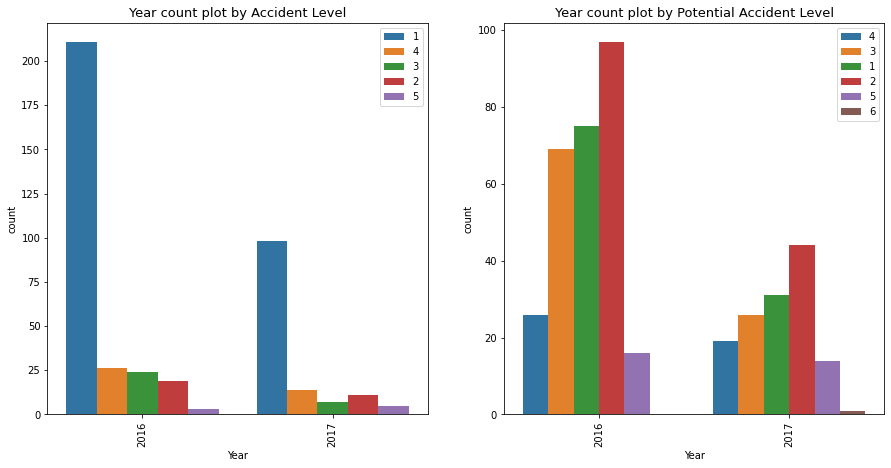

In [51]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Year', data = incidents_data_df, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title('Year'.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = incidents_data_df['Accident Level'].unique())
plt.xticks(rotation = 90)
    
ax = fig.add_subplot(122)
sns.countplot(x ='Year' , data = incidents_data_df, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title('Year'.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = incidents_data_df['Potential Accident Level'].unique())
plt.xticks(rotation = 90)






#### **Year Vs Accident Level**
*   **Accident level I is highest in year 2016 and 2017.**
*   **In Year 2016 more accidents happened in than 2017.**

#### **Year Vs Potential Accident Level**
*   **Potential Accident level 4 is highest in year 2016 and 2017.**
*   **In Year 2016 more potential accidents happened in than 2017.**
*   **Potential Accident level 6 is didn;t happened in year 2016.**

**Local Vs Accident level and Local Vs Potential accident level**

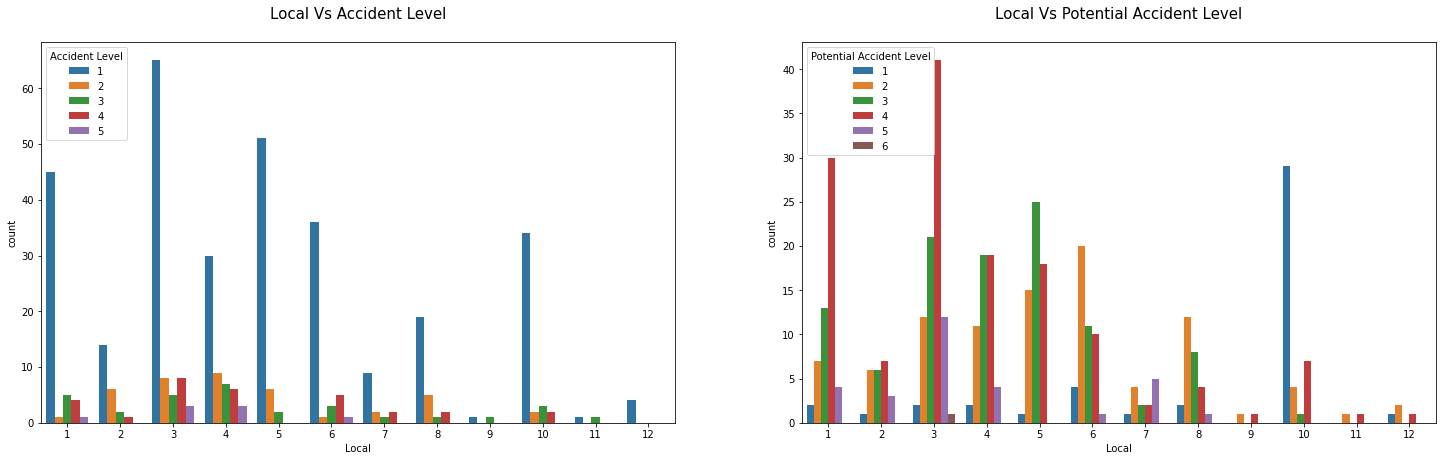

In [52]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(25,7)

sns.countplot(x=incidents_data_df['Local'], hue = incidents_data_df['Accident Level'],ax = ax1)
ax1.set_title('Local Vs Accident Level\n',fontsize = 15)

sns.countplot(x=incidents_data_df['Local'],hue = incidents_data_df['Potential Accident Level'],ax=ax2)
ax2.set_title('Local Vs Potential Accident Level\n',fontsize = 15)

plt.show()

#### **Local Vs Accident Level**
*   **Accident level I is highest in almost all localities.**
*   **Accident level I is highest in Local 3.**
*   **Local 9,11 and 12 have less accidents level.**

#### **Local Vs Potential Accident Level**
*   **Potential Accident level 4 is highest in Local 3.**
*   **Potential Accident level 4 is higher in most localities.**
*   **Local 9,11 and 12 have less potential accidents level.**
*   **Potential Accident level 1 is highest in local 10.**
*   **Potential Accident level 3 is highest in local 5.**

**Year Vs Accident level and Year Vs Potential accident level**

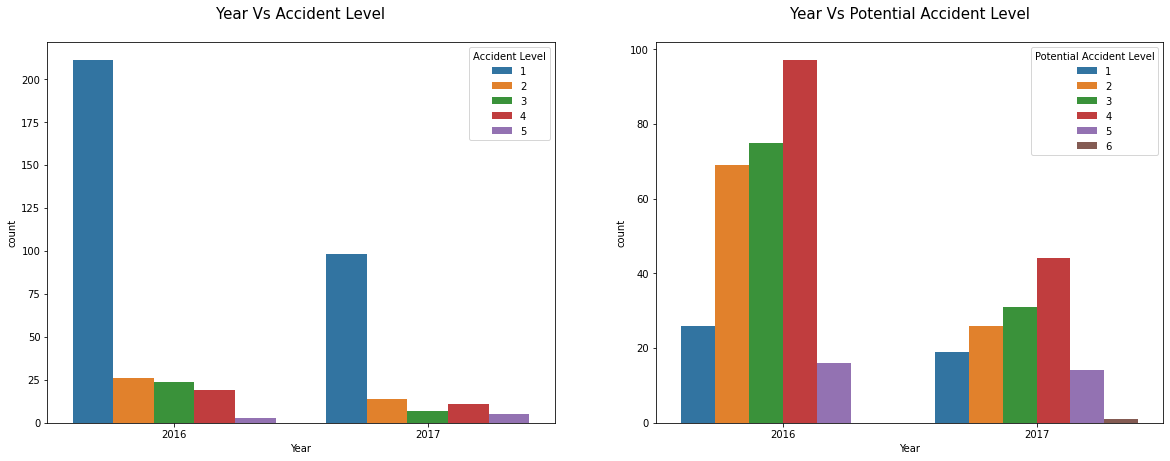

In [53]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,7)

sns.countplot(x=incidents_data_df['Year'], hue = incidents_data_df['Accident Level'],ax = ax1)
ax1.set_title('Year Vs Accident Level\n',fontsize = 15)

sns.countplot(x=incidents_data_df['Year'],hue = incidents_data_df['Potential Accident Level'],ax=ax2)
ax2.set_title('Year Vs Potential Accident Level\n',fontsize = 15)

plt.show()

#### **Year Vs Accident Level**
*   **Accident level I is highest in year 2016 and 2017.**
*   **In Year 2016 more accidents happened in than 2017.**

#### **Year Vs Potential Accident Level**
*   **Potential Accident level 4 is highest in year 2016 and 2017.**
*   **In Year 2016 more potential accidents happened in than 2017.**
*   **Potential Accident level 6 is didn;t happened in year 2016.**

**Local Vs Year**

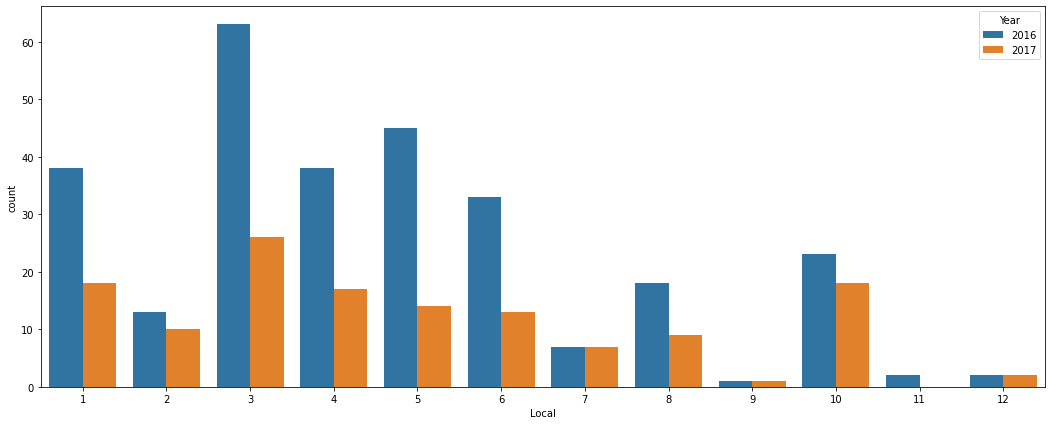

In [54]:
plt.figure(figsize=(18,7))
sns.countplot(x=incidents_data_df["Local"],hue=incidents_data_df["Year"]);

*   **In 2016 and 2017 local 3 has more accidents than other localities.**
*   **Local 9,11,12 has less accidents in 2016 and 2017 than all other localities**

**Country Vs Year**

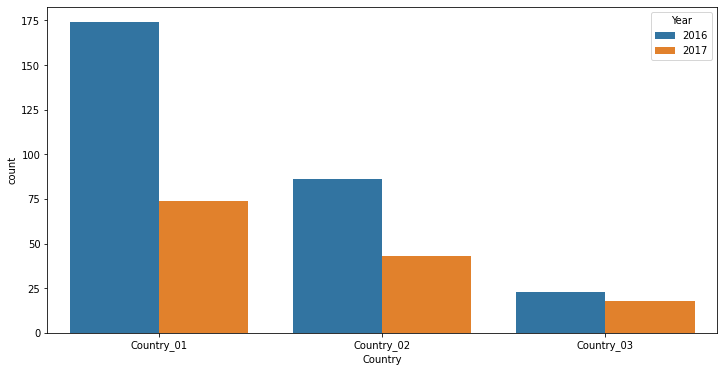

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x=incidents_data_df["Country"],hue=incidents_data_df["Year"]);

*   **In 2016 and 2017 country 1 has more accidents than other countries.**
*   **In 2016 and 2017 country 3 has least accidents than other countries.**

**Analyzing Country and Employee Type**


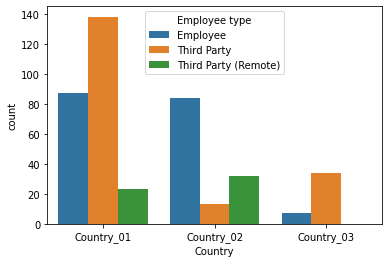

In [56]:
sns.countplot(x="Country", data=incidents_data_df, hue="Employee type");

Incidents in Country_01 has Employee type of Third Party high in number.

Incidents in Country_02 has Employee type of Employee high in number.

Incidents in Country_03 has Employee type of Third Party high in number.

**Analyzing Country and Industry Sector**

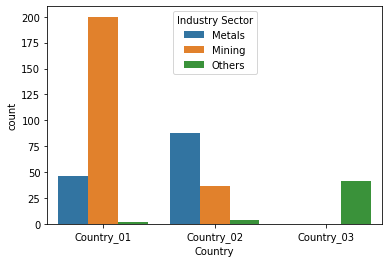

In [57]:
sns.countplot(x="Country", data=incidents_data_df, hue="Industry Sector");


In Country_01, Incidents in Mining sector are very high.

In Country_02, Incidents in Metals sector are very high.

In Country_03, Incidents in Other sectors are very high.

**Local Vs Employee Type**

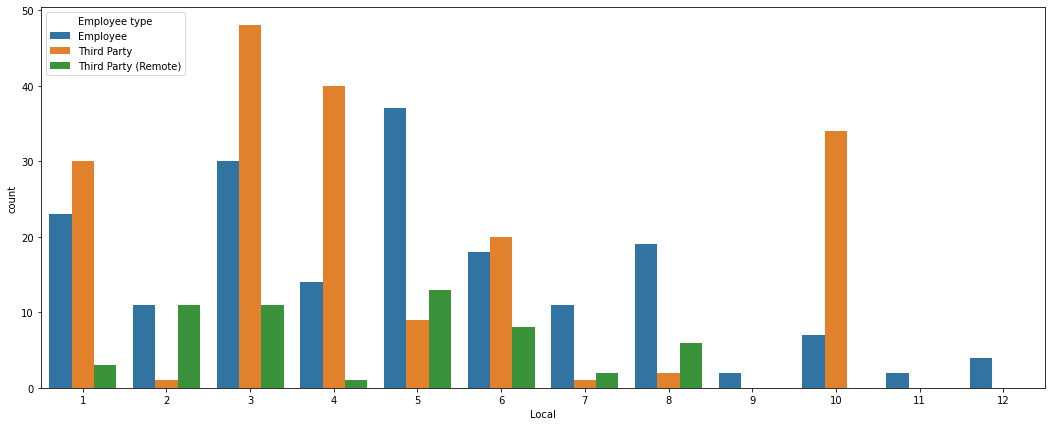

In [58]:
plt.figure(figsize=(18,7))
sns.countplot(x=incidents_data_df["Local"], hue=incidents_data_df["Employee type"]);

*   **Local 3 has highest no of Third Party employees**
*   **Local 3 has more employees than other localities.**
*   **Local 10 don;t have Third Party (Remote) employees.**
*   **Local 9,11,12 don;t have Employee and Third Party employees.**

**Local vs Industry Sector**

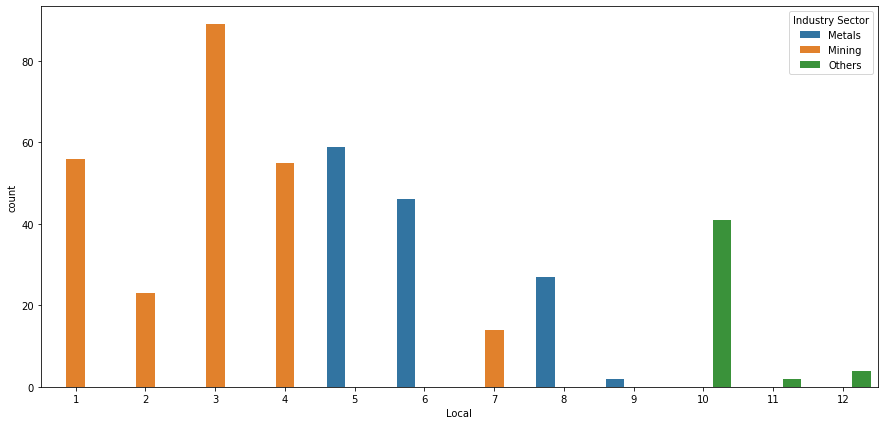

In [59]:
plt.figure(figsize=(15,7))
sns.countplot(x=incidents_data_df["Local"],hue=incidents_data_df["Industry Sector"]);

*   **Local 3 has highest number of Mining industry sector.**
*   **Local 5 has highest number of Metals industry sector.**
*   **Local 1,2,3,4,7 has Mining industry sector.**
*   **Local 5,6,8,9 has Metals industry sector.**
*   **Local 10,11,12 has Others industry sector.**

**Local vs Country**

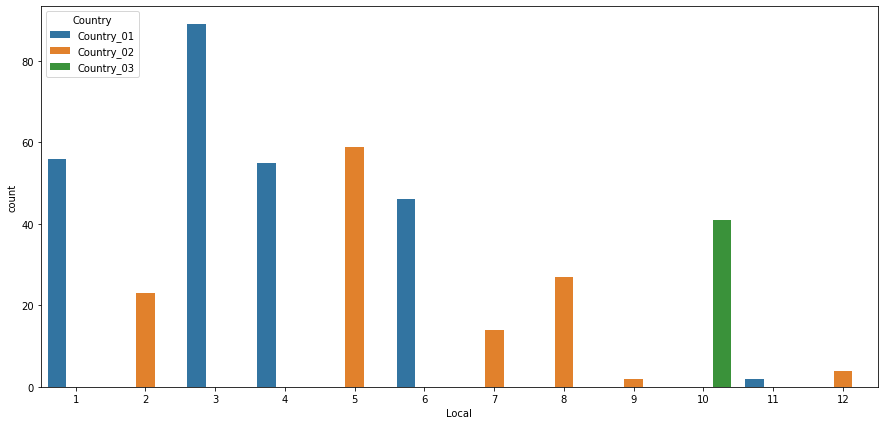

In [60]:
plt.figure(figsize=(15,7))
sns.countplot(x=incidents_data_df["Local"],hue=incidents_data_df["Country"]);

*   **Local 3 has biggest in Country 1.**
*   **Local 2 has biggest in Country 1..**
*   **Local 1,3,4,6,11 belongs to country 1.**
*   **Local 2,5,7,8,9,12 belongs to country 2.**
*   **Local 10 belongs to country 3.**

In [61]:
print('--'*35)
print('Checking 5% random samples from the data'); print('--'*35)
print('\n\n')

wrapper = textwrap.TextWrapper(width=100)


rand_sample = incidents_data_df.sample(frac=0.05)

for index, row in rand_sample.iterrows():
  
  word_list = wrapper.wrap(text=row['Description'])

  for element in word_list:
    print(element)
  print(f"\nAccident Level: {row['Accident Level']} \nPotential Accident Level: {row['Potential Accident Level']} \nCritical Risk: {row['Critical Risk']}\n\n")
  print('--'*50);

----------------------------------------------------------------------
Checking 5% random samples from the data
----------------------------------------------------------------------



In bypass 100 of level 1970 when the workers of the company Incimet Raul (operator of Bolter bolting
team) and Rolando (assistant) retired after installing the support with helical bolt, the pink team
with a mesh overhanging the gable, so the teacher tells his assistant to cut the mesh and the
instant the assistant finished cutting the mesh, it suddenly rises hitting his face causing the
injury described.

Accident Level: 1 
Potential Accident Level: 2 
Critical Risk: Others


----------------------------------------------------------------------------------------------------
The employee was clearing the liquid zinc pump from oven 04, when he stepped on the platform and
became unbalanced with a twist in his left foot.

Accident Level: 1 
Potential Accident Level: 4 
Critical Risk: Fall prevention (same

In [62]:
import spacy
from spacy.cli.download import download
download(model="en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [63]:
from spacy.language import Language

In [64]:
def get_lang_detector(nlp, name):
    return LanguageDetector()

In [65]:
lan_detect = spacy.load('en_core_web_sm')
Language.factory("language_detector", func=get_lang_detector)
lan_detect.add_pipe('language_detector', last=True)

In [66]:
def get_language(text):
  doc = lan_detect(text)
  detect_language = doc._.language

  if detect_language['score'] >= 0.95:
    return pd.Series([detect_language['language'], round(detect_language['score'])])
  else:
    return pd.Series(['non-en', round(detect_language['score'])])

In [67]:
sample = incidents_data_df['Description'] [0]
print(get_language(sample))

0    en
1     1
dtype: object


In [68]:
incidents_data_df[['Language', 'Lang Score']] = incidents_data_df['Description'].apply(lambda x: get_language(x))

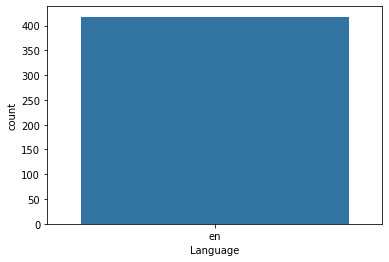

In [69]:
sns.countplot(data=incidents_data_df, x='Language')

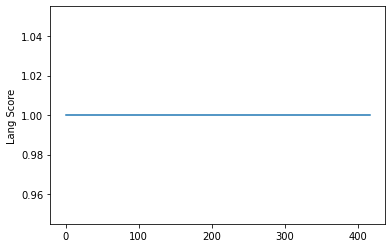

In [70]:
sns.lineplot(data=incidents_data_df['Lang Score'])

<html>
<p style="color:Blue;"> <b>Observations:</b></p>
    <ul style="color:Darkblue;">
    <li>All Language is English</li>
</ul>
</html>

**Text Pre-processing**

In [71]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
nltk.download('stopwords')
stop=set(stopwords.words('english'))

def preprocess_text(text):
      corpus=[]
      #stem=PorterStemmer()
      lem=WordNetLemmatizer()
      for news in text:
          words=[w for w in word_tokenize(news) if (w not in stop)]
          
          words=[lem.lemmatize(w) for w in words if len(w)>2]
          words = [''.join(c for c in s if c not in string.punctuation) for s in words if s]
          words = [word.lower() for word in words]
          words = [word for word in words if word.isalpha()]
          corpus.append(words) 
         
      return corpus     
      
incidents_data_df['processed_text']= preprocess_text(incidents_data_df['Description'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
incidents_data_df.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Language,Lang Score,processed_text
0,2016-01-01,Country_01,1,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,en,1,"[while, removing, drill, rod, jumbo, maintenan..."
1,2016-01-02,Country_02,2,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,en,1,"[during, activation, sodium, sulphide, pump, p..."
2,2016-01-06,Country_01,3,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,en,1,"[substation, milpo, located, level, collaborat..."
3,2016-01-08,Country_01,4,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,Summer,en,1,"[being, approximately, personnel, begin, task,..."
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,Summer,en,1,"[approximately, am, circumstance, mechanic, an..."


In [73]:
incidents_data_df['processed_text']

0      [while, removing, drill, rod, jumbo, maintenan...
1      [during, activation, sodium, sulphide, pump, p...
2      [substation, milpo, located, level, collaborat...
3      [being, approximately, personnel, begin, task,...
4      [approximately, am, circumstance, mechanic, an...
                             ...                        
413    [being, approximately, am, approximately, lift...
414    [the, collaborator, moved, infrastructure, off...
415    [during, environmental, monitoring, activity, ...
416    [the, employee, performed, activity, stripping...
417    [am, assistant, cleaned, floor, module, centra...
Name: processed_text, Length: 418, dtype: object

In [74]:
lgt = []
for i in incidents_data_df['processed_text']:
  lgt.append(len(i))
print('Maximum length of the sentence in processed text (in list) :',max(lgt))

Maximum length of the sentence in processed text (in list) : 95


In [75]:
incidents_data_df

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Language,Lang Score,processed_text
0,2016-01-01,Country_01,1,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,en,1,"[while, removing, drill, rod, jumbo, maintenan..."
1,2016-01-02,Country_02,2,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,en,1,"[during, activation, sodium, sulphide, pump, p..."
2,2016-01-06,Country_01,3,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,en,1,"[substation, milpo, located, level, collaborat..."
3,2016-01-08,Country_01,4,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,Summer,en,1,"[being, approximately, personnel, begin, task,..."
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,Summer,en,1,"[approximately, am, circumstance, mechanic, an..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2017-07-04,Country_01,4,Mining,1,3,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2017,7,4,Tuesday,27,Winter,en,1,"[being, approximately, am, approximately, lift..."
414,2017-07-04,Country_01,3,Mining,1,2,Female,Employee,Others,The collaborator moved from the infrastructure...,2017,7,4,Tuesday,27,Winter,en,1,"[the, collaborator, moved, infrastructure, off..."
415,2017-07-05,Country_02,9,Metals,1,2,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,2017,7,5,Wednesday,27,Winter,en,1,"[during, environmental, monitoring, activity, ..."
416,2017-07-06,Country_02,5,Metals,1,2,Male,Employee,Cut,The Employee performed the activity of strippi...,2017,7,6,Thursday,27,Winter,en,1,"[the, employee, performed, activity, stripping..."


In [88]:
desc_processed = []
for i in range(len(incidents_data_df['processed_text'])):
   desc_processed.append(' '.join(wrd for wrd in incidents_data_df.iloc[:,18][i]))
    
  

In [89]:
incidents_data_df['description_processed'] = desc_processed

In [90]:
incidents_data_df.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Language,Lang Score,processed_text,description_processed
0,2016-01-01,Country_01,1,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,en,1,"[while, removing, drill, rod, jumbo, maintenan...",while removing drill rod jumbo maintenance sup...
1,2016-01-02,Country_02,2,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,en,1,"[during, activation, sodium, sulphide, pump, p...",during activation sodium sulphide pump piping ...
2,2016-01-06,Country_01,3,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,en,1,"[substation, milpo, located, level, collaborat...",substation milpo located level collaborator ex...
3,2016-01-08,Country_01,4,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,Summer,en,1,"[being, approximately, personnel, begin, task,...",being approximately personnel begin task unloc...
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,Summer,en,1,"[approximately, am, circumstance, mechanic, an...",approximately am circumstance mechanic anthony...


**Number of characters present in each sentence**

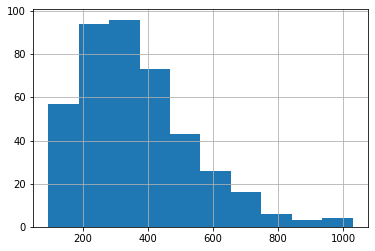

In [91]:
incidents_data_df['Description'].str.len().hist();


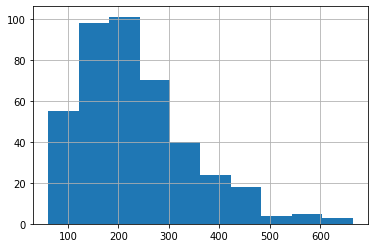

In [92]:
incidents_data_df['description_processed'].str.len().hist();

**Number of words appearing in each description**

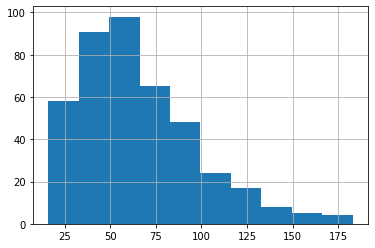

In [93]:
incidents_data_df['Description'].str.split().map(lambda x: len(x)).hist();

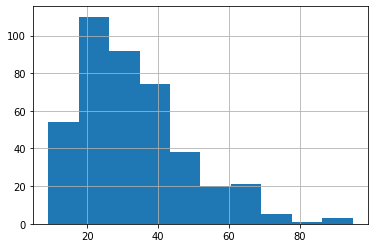

In [94]:
incidents_data_df['description_processed'].str.split().map(lambda x: len(x)).hist();

**Average word length**

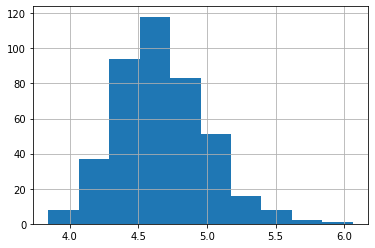

In [95]:
incidents_data_df['Description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist();

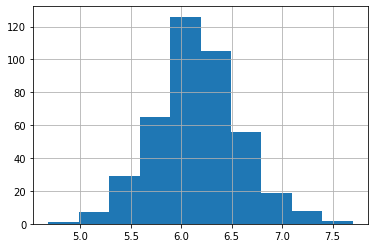

In [96]:
incidents_data_df['description_processed'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist();

###**Target label - Accident level**

In [97]:
X = incidents_data_df['description_processed']
y = incidents_data_df['Accident Level']
yp = incidents_data_df['Potential Accident Level']

cnt_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2))
X_bow = cnt_vectorizer.fit_transform(X).toarray()
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, test_size=0.15, random_state=42)
Xp_train_bow, Xp_test_bow, yp_train_bow, yp_test_bow = train_test_split(X_bow, yp, test_size=0.15, random_state=42)

In [98]:
accuracy_sc1 = []
accuracy_sc2 = []
models_list = []
def print_accuracy(model,tr_acc_score, test_acc_score):
    global all_models_bow
    accuracy_sc1.append(tr_acc_score)
    accuracy_sc2.append(test_acc_score)
    models_list.append(model)
    model_name = pd.DataFrame(models_list,columns=['Model'])
    model_tr_acc = pd.DataFrame(accuracy_sc1,columns=['train_accuracy'])
    model_test_ac = pd.DataFrame(accuracy_sc2,columns=['test_accuracy'])
    all_models_bow = pd.concat([model_name, model_tr_acc, model_test_ac], axis=1)
    print(all_models_bow)

In [99]:
svc_model = LinearSVC(max_iter=2000)
svc_model.fit(X_train_bow, y_train_bow)
pred = svc_model.predict(X_test_bow)

# Evaluation
acc_svc = accuracy_score(y_test_bow, pred)
acc_svc_tr = svc_model.score(X_train_bow, y_train_bow)
print("Train accuracy of the SVC model : {:.2f}".format(acc_svc_tr*100))
print("Test accuracy of the SVC model : {:.2f}".format(acc_svc*100))
print('Classification report:: \n',classification_report(y_test_bow, pred))
print('Confusion matrix:', confusion_matrix(y_test_bow,pred))

Train accuracy of the SVC model : 99.44
Test accuracy of the SVC model : 76.19
Classification report:: 
               precision    recall  f1-score   support

           1       0.80      0.98      0.88        48
           2       0.00      0.00      0.00         5
           3       0.50      0.25      0.33         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.26      0.25      0.24        63
weighted avg       0.64      0.76      0.69        63

Confusion matrix: [[47  1  0  0  0]
 [ 5  0  0  0  0]
 [ 3  0  1  0  0]
 [ 3  1  1  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
print_accuracy('SVC Clf',svc_model.score(X_train_bow, y_train_bow), accuracy_score(y_test_bow, pred))

     Model  train_accuracy  test_accuracy
0  SVC Clf        0.994366       0.761905


In [101]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_bow, y_train_bow)
pred = random_forest_model.predict(X_test_bow)

acc_rf_clf = accuracy_score(y_test_bow, pred)
acc_rf_clf_tr = random_forest_model.score(X_train_bow,y_train_bow)

print("Train Accuracy of the Random Forest model : {:.2f}".format(acc_rf_clf_tr*100))
print("Test Accuracy of the Random Forest model : {:.2f}".format(acc_rf_clf*100))
print('Classification report:: \n',classification_report(y_test_bow, pred))
print('Confusion matrix:', confusion_matrix(y_test_bow,pred))

Train Accuracy of the Random Forest model : 99.44
Test Accuracy of the Random Forest model : 76.19
Classification report:: 
               precision    recall  f1-score   support

           1       0.76      1.00      0.86        48
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
print_accuracy('RandomForest',random_forest_model.score(X_train_bow, y_train_bow), accuracy_score(y_test_bow, pred))

          Model  train_accuracy  test_accuracy
0       SVC Clf        0.994366       0.761905
1  RandomForest        0.994366       0.761905


In [103]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_bow, y_train_bow)
pred = xgb_clf.predict(X_test_bow)
acc_xgbc = accuracy_score(y_test_bow, pred)
acc_xgbc_tr = xgb_clf.score(X_train_bow,y_train_bow)

print(" Test accuracy of the XGBoost model : {:.2f}".format(acc_xgbc*100))
print("Train accuracy of the XGBoost model : {:.2f}".format(acc_xgbc_tr*100))
print('Classification report:: \n',classification_report(y_test_bow, pred))
print('Confusion matrix:', confusion_matrix(y_test_bow,pred))

 Test accuracy of the XGBoost model : 73.02
Train accuracy of the XGBoost model : 93.80
Classification report:: 
               precision    recall  f1-score   support

           1       0.75      0.96      0.84        48
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.73        63
   macro avg       0.15      0.19      0.17        63
weighted avg       0.57      0.73      0.64        63

Confusion matrix: [[46  0  1  0  1]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
print_accuracy('XGB Clf',xgb_clf.score(X_train_bow, y_train_bow), accuracy_score(y_test_bow, pred))

          Model  train_accuracy  test_accuracy
0       SVC Clf        0.994366       0.761905
1  RandomForest        0.994366       0.761905
2       XGB Clf        0.938028       0.730159


In [105]:
gbc_clf = GradientBoostingClassifier(n_estimators=100)
gbc_clf.fit(X_train_bow, y_train_bow)
pred = gbc_clf.predict(X_test_bow)
acct_gbc = accuracy_score(y_test_bow, pred)
acct_gbc_tr = gbc_clf.score(X_train_bow,y_train_bow)

print("Train accuracy of the Gradient boosting model : {:.2f}".format(acct_gbc*100))
print("Test accuracy of the Gradient boosting model : {:.2f}".format(acct_gbc_tr*100))
print('Classification report:: \n',classification_report(y_test_bow, pred))
print('Confusion matrix:', confusion_matrix(y_test_bow,pred))


Train accuracy of the Gradient boosting model : 74.60
Test accuracy of the Gradient boosting model : 99.44
Classification report:: 
               precision    recall  f1-score   support

           1       0.80      0.98      0.88        48
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.75        63
   macro avg       0.16      0.20      0.18        63
weighted avg       0.61      0.75      0.67        63

Confusion matrix: [[47  0  0  1  0]
 [ 5  0  0  0  0]
 [ 3  0  0  1  0]
 [ 3  0  2  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
print_accuracy('GradientBoost Clf',gbc_clf.score(X_train_bow, y_train_bow), accuracy_score(y_test_bow, pred))

               Model  train_accuracy  test_accuracy
0            SVC Clf        0.994366       0.761905
1       RandomForest        0.994366       0.761905
2            XGB Clf        0.938028       0.730159
3  GradientBoost Clf        0.994366       0.746032


In [107]:
bg_clf = BaggingClassifier()
bg_clf.fit(X_train_bow, y_train_bow)
pred = bg_clf.predict(X_test_bow)
acc_bg = accuracy_score(y_test_bow, pred)
acc_bg_tr = bg_clf.score(X_train_bow,y_train_bow)

print(" Test accuracy of the Bagging model : {:.2f}".format(acc_bg*100))
print("Train accuracy of the Bagging model : {:.2f}".format(acc_bg_tr*100))
print('Classification report:: \n',classification_report(y_test_bow, pred))
print('Confusion matrix:', confusion_matrix(y_test_bow,pred))

 Test accuracy of the Bagging model : 76.19
Train accuracy of the Bagging model : 94.65
Classification report:: 
               precision    recall  f1-score   support

           1       0.77      1.00      0.87        48
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.59      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 4  0  1  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
print_accuracy('Bagging Clf',bg_clf.score(X_train_bow, y_train_bow), accuracy_score(y_test_bow, pred))

               Model  train_accuracy  test_accuracy
0            SVC Clf        0.994366       0.761905
1       RandomForest        0.994366       0.761905
2            XGB Clf        0.938028       0.730159
3  GradientBoost Clf        0.994366       0.746032
4        Bagging Clf        0.946479       0.761905


In [109]:
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X_train_bow, y_train_bow)
pred = dtree_clf.predict(X_test_bow)
acc_dtree = accuracy_score(y_test_bow, pred)
acc_dtree_tr = dtree_clf.score(X_train_bow,y_train_bow)

print(" Test accuracy of the DecisionTree model : {:.2f}".format(acc_dtree*100))
print("Train accuracy of the DecisionTree model : {:.2f}".format(acc_dtree_tr*100))
print('Classification report:: \n',classification_report(y_test_bow, pred))
print('Confusion matrix:', confusion_matrix(y_test_bow,pred))

 Test accuracy of the DecisionTree model : 66.67
Train accuracy of the DecisionTree model : 99.44
Classification report:: 
               precision    recall  f1-score   support

           1       0.79      0.85      0.82        48
           2       0.00      0.00      0.00         5
           3       0.33      0.25      0.29         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.67        63
   macro avg       0.22      0.22      0.22        63
weighted avg       0.62      0.67      0.64        63

Confusion matrix: [[41  3  1  2  1]
 [ 5  0  0  0  0]
 [ 1  1  1  1  0]
 [ 4  0  1  0  0]
 [ 1  0  0  0  0]]


In [110]:
print_accuracy('DecisionTree Clf',dtree_clf.score(X_train_bow, y_train_bow), accuracy_score(y_test_bow, pred))

               Model  train_accuracy  test_accuracy
0            SVC Clf        0.994366       0.761905
1       RandomForest        0.994366       0.761905
2            XGB Clf        0.938028       0.730159
3  GradientBoost Clf        0.994366       0.746032
4        Bagging Clf        0.946479       0.761905
5   DecisionTree Clf        0.994366       0.666667


In [111]:
lr_model = LogisticRegression()
lr_model = OneVsRestClassifier(lr_model)
lr_model.fit(X_train_bow, y_train_bow)
pred = lr_model.predict(X_test_bow)

# Evaluation
acc_lr = accuracy_score(y_test_bow, pred)
acc_lr_tr = lr_model.score(X_train_bow, y_train_bow)
print("Train accuracy of the LogReg model : {:.2f}".format(acc_lr_tr*100))
print("Test accuracy of the LogReg model : {:.2f}".format(acc_lr*100))
print('Classification report:: \n',classification_report(y_test_bow, pred))
print('Confusion matrix:', confusion_matrix(y_test_bow,pred))

Train accuracy of the LogReg model : 99.44
Test accuracy of the LogReg model : 76.19
Classification report:: 
               precision    recall  f1-score   support

           1       0.80      0.98      0.88        48
           2       0.00      0.00      0.00         5
           3       0.33      0.25      0.29         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.23      0.25      0.23        63
weighted avg       0.63      0.76      0.69        63

Confusion matrix: [[47  1  0  0  0]
 [ 5  0  0  0  0]
 [ 3  0  1  0  0]
 [ 3  0  2  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
print_accuracy('LogisticRegression Clf',lr_model.score(X_train_bow, y_train_bow), accuracy_score(y_test_bow, pred))

                    Model  train_accuracy  test_accuracy
0                 SVC Clf        0.994366       0.761905
1            RandomForest        0.994366       0.761905
2                 XGB Clf        0.938028       0.730159
3       GradientBoost Clf        0.994366       0.746032
4             Bagging Clf        0.946479       0.761905
5        DecisionTree Clf        0.994366       0.666667
6  LogisticRegression Clf        0.994366       0.761905


In [113]:
nb_clf_model = BernoulliNB()
nb_clf_model.fit(X_train_bow, y_train_bow)
pred = nb_clf_model.predict(X_test_bow)

# Evaluation
acc_svc = accuracy_score(y_test_bow, pred)
acc_svc_tr = svc_model.score(X_train_bow, y_train_bow)
print("Train accuracy of the SVC model : {:.2f}".format(acc_svc_tr*100))
print("Test accuracy of the SVC model : {:.2f}".format(acc_svc*100))
print('Classification report:: \n',classification_report(y_test_bow, pred))
print('Confusion matrix:', confusion_matrix(y_test_bow,pred))

Train accuracy of the SVC model : 99.44
Test accuracy of the SVC model : 76.19
Classification report:: 
               precision    recall  f1-score   support

           1       0.76      1.00      0.86        48
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
print_accuracy('NaiveBayes Clf',nb_clf_model.score(X_train_bow, y_train_bow), accuracy_score(y_test_bow, pred))

                    Model  train_accuracy  test_accuracy
0                 SVC Clf        0.994366       0.761905
1            RandomForest        0.994366       0.761905
2                 XGB Clf        0.938028       0.730159
3       GradientBoost Clf        0.994366       0.746032
4             Bagging Clf        0.946479       0.761905
5        DecisionTree Clf        0.994366       0.666667
6  LogisticRegression Clf        0.994366       0.761905
7          NaiveBayes Clf        0.735211       0.761905


In [115]:
all_models_bow

,Model,train_accuracy,test_accuracy
0,SVC Clf,0.994366,0.761905
1,RandomForest,0.994366,0.761905
2,XGB Clf,0.938028,0.730159
3,GradientBoost Clf,0.994366,0.746032
4,Bagging Clf,0.946479,0.761905
5,DecisionTree Clf,0.994366,0.666667
6,LogisticRegression Clf,0.994366,0.761905
7,NaiveBayes Clf,0.735211,0.761905


In [116]:
accuracy_sc1 = []
accuracy_sc2 = []
models_list = []
def print_accuracy(model,tr_acc_score, test_acc_score):
    global all_models_bow_p
    accuracy_sc1.append(tr_acc_score)
    accuracy_sc2.append(test_acc_score)
    models_list.append(model)
    model_name = pd.DataFrame(models_list,columns=['Model'])
    model_tr_acc = pd.DataFrame(accuracy_sc1,columns=['train_accuracy'])
    model_test_ac = pd.DataFrame(accuracy_sc2,columns=['test_accuracy'])
    all_models_bow_p = pd.concat([model_name, model_tr_acc, model_test_ac], axis=1)
    print(all_models_bow_p)

In [117]:
svc_model = LinearSVC(max_iter=2000)
svc_model.fit(Xp_train_bow, yp_train_bow)
pred = svc_model.predict(Xp_test_bow)

# Evaluation
acc_svc = accuracy_score(yp_test_bow, pred)
acc_svc_tr = svc_model.score(Xp_train_bow, yp_train_bow)
print("Train accuracy of the SVC model : {:.2f}".format(acc_svc_tr*100))
print("Test accuracy of the SVC model : {:.2f}".format(acc_svc*100))
print('Classification report: \n',classification_report(yp_test_bow, pred))
print('Confusion matrix:', confusion_matrix(yp_test_bow,pred))

Train accuracy of the SVC model : 99.72
Test accuracy of the SVC model : 44.44
Classification report: 
               precision    recall  f1-score   support

           1       0.50      0.14      0.22         7
           2       0.46      0.55      0.50        11
           3       0.35      0.32      0.33        19
           4       0.48      0.65      0.56        23
           5       0.00      0.00      0.00         3

    accuracy                           0.44        63
   macro avg       0.36      0.33      0.32        63
weighted avg       0.42      0.44      0.42        63

Confusion matrix: [[ 1  1  4  1  0]
 [ 0  6  2  3  0]
 [ 0  3  6 10  0]
 [ 1  3  4 15  0]
 [ 0  0  1  2  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
print_accuracy('SVM Clf',svc_model.score(Xp_train_bow, yp_train_bow), accuracy_score(yp_test_bow, pred))

     Model  train_accuracy  test_accuracy
0  SVM Clf        0.997183       0.444444


In [119]:
lr_model = LogisticRegression()
lr_model = OneVsRestClassifier(lr_model)
lr_model.fit(Xp_train_bow, yp_train_bow)
pred = lr_model.predict(Xp_test_bow)

# Evaluation
acc_lr = accuracy_score(yp_test_bow, pred)
acc_lr_tr = lr_model.score(Xp_train_bow, yp_train_bow)
print("Train accuracy of the LogReg model : {:.2f}".format(acc_lr_tr*100))
print("Test accuracy of the LogReg model : {:.2f}".format(acc_lr*100))
print('Classification report:: \n',classification_report(y_test_bow, pred))
print('Confusion matrix:', confusion_matrix(y_test_bow,pred))

Train accuracy of the LogReg model : 99.72
Test accuracy of the LogReg model : 47.62
Classification report:: 
               precision    recall  f1-score   support

           1       1.00      0.02      0.04        48
           2       0.10      0.20      0.13         5
           3       0.00      0.00      0.00         4
           4       0.14      1.00      0.25         5
           5       0.00      0.00      0.00         1

    accuracy                           0.11        63
   macro avg       0.25      0.24      0.08        63
weighted avg       0.78      0.11      0.06        63

Confusion matrix: [[ 1  8 14 25  0]
 [ 0  1  3  1  0]
 [ 0  1  0  3  0]
 [ 0  0  0  5  0]
 [ 0  0  0  1  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
print_accuracy('LogisticRegression Clf',lr_model.score(Xp_train_bow, yp_train_bow), accuracy_score(yp_test_bow, pred))

                    Model  train_accuracy  test_accuracy
0                 SVM Clf        0.997183       0.444444
1  LogisticRegression Clf        0.997183       0.476190


In [121]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(Xp_train_bow, yp_train_bow)
pred = random_forest_model.predict(Xp_test_bow)

acc_rf_clf = accuracy_score(yp_test_bow, pred)
acc_rf_clf_tr = random_forest_model.score(Xp_train_bow,yp_train_bow)

print("Train Accuracy of the Random Forest model : {:.2f}".format(acc_rf_clf_tr*100))
print("Test Accuracy of the Random Forest model : {:.2f}".format(acc_rf_clf*100))
print('Classification report:: \n',classification_report(yp_test_bow, pred))
print('Confusion matrix:', confusion_matrix(yp_test_bow,pred))

Train Accuracy of the Random Forest model : 99.72
Test Accuracy of the Random Forest model : 38.10
Classification report:: 
               precision    recall  f1-score   support

           1       0.50      0.14      0.22         7
           2       0.50      0.27      0.35        11
           3       0.45      0.26      0.33        19
           4       0.34      0.65      0.45        23
           5       0.00      0.00      0.00         3

    accuracy                           0.38        63
   macro avg       0.36      0.27      0.27        63
weighted avg       0.40      0.38      0.35        63

Confusion matrix: [[ 1  0  0  6  0]
 [ 0  3  2  6  0]
 [ 0  0  5 14  0]
 [ 1  3  4 15  0]
 [ 0  0  0  3  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
print_accuracy('RandomForest Clf',random_forest_model.score(Xp_train_bow, yp_train_bow), accuracy_score(yp_test_bow, pred))

                    Model  train_accuracy  test_accuracy
0                 SVM Clf        0.997183       0.444444
1  LogisticRegression Clf        0.997183       0.476190
2        RandomForest Clf        0.997183       0.380952


In [123]:
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(Xp_train_bow, yp_train_bow)
pred = dtree_clf.predict(Xp_test_bow)
acc_dtree = accuracy_score(yp_test_bow, pred)
acc_dtree_tr = dtree_clf.score(Xp_train_bow,yp_train_bow)

print(" Test accuracy of the DecisionTree model : {:.2f}".format(acc_dtree*100))
print("Train accuracy of the DecisionTree model : {:.2f}".format(acc_dtree_tr*100))
print('Classification report:: \n',classification_report(yp_test_bow, pred))
print('Confusion matrix:', confusion_matrix(yp_test_bow,pred))

 Test accuracy of the DecisionTree model : 33.33
Train accuracy of the DecisionTree model : 99.72
Classification report:: 
               precision    recall  f1-score   support

           1       0.67      0.29      0.40         7
           2       0.12      0.09      0.11        11
           3       0.25      0.32      0.28        19
           4       0.43      0.43      0.43        23
           5       0.40      0.67      0.50         3

    accuracy                           0.33        63
   macro avg       0.38      0.36      0.34        63
weighted avg       0.35      0.33      0.33        63

Confusion matrix: [[ 2  0  4  1  0]
 [ 0  1  6  4  0]
 [ 0  3  6  7  3]
 [ 1  4  8 10  0]
 [ 0  0  0  1  2]]


In [124]:
print_accuracy('DecisionTree Clf',dtree_clf.score(Xp_train_bow, yp_train_bow), accuracy_score(yp_test_bow, pred))

                    Model  train_accuracy  test_accuracy
0                 SVM Clf        0.997183       0.444444
1  LogisticRegression Clf        0.997183       0.476190
2        RandomForest Clf        0.997183       0.380952
3        DecisionTree Clf        0.997183       0.333333


In [125]:
bg_clf = BaggingClassifier()
bg_clf.fit(Xp_train_bow, yp_train_bow)
pred = bg_clf.predict(Xp_test_bow)
acc_bg = accuracy_score(yp_test_bow, pred)
acc_bg_tr = bg_clf.score(Xp_train_bow,yp_train_bow)

print(" Test accuracy of the Bagging model : {:.2f}".format(acc_bg*100))
print("Train accuracy of the Bagging model : {:.2f}".format(acc_bg_tr*100))
print('Classification report:: \n',classification_report(yp_test_bow, pred))
print('Confusion matrix:', confusion_matrix(yp_test_bow,pred))

 Test accuracy of the Bagging model : 34.92
Train accuracy of the Bagging model : 97.75
Classification report:: 
               precision    recall  f1-score   support

           1       1.00      0.14      0.25         7
           2       0.29      0.36      0.32        11
           3       0.25      0.26      0.26        19
           4       0.43      0.52      0.47        23
           5       0.00      0.00      0.00         3

    accuracy                           0.35        63
   macro avg       0.39      0.26      0.26        63
weighted avg       0.39      0.35      0.33        63

Confusion matrix: [[ 1  2  4  0  0]
 [ 0  4  2  5  0]
 [ 0  4  5 10  0]
 [ 0  4  7 12  0]
 [ 0  0  2  1  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
print_accuracy('Bagging Clf',bg_clf.score(Xp_train_bow, yp_train_bow), accuracy_score(yp_test_bow, pred))

                    Model  train_accuracy  test_accuracy
0                 SVM Clf        0.997183       0.444444
1  LogisticRegression Clf        0.997183       0.476190
2        RandomForest Clf        0.997183       0.380952
3        DecisionTree Clf        0.997183       0.333333
4             Bagging Clf        0.977465       0.349206


In [127]:
all_models_bow_p

,Model,train_accuracy,test_accuracy
0,SVM Clf,0.997183,0.444444
1,LogisticRegression Clf,0.997183,0.476190
2,RandomForest Clf,0.997183,0.380952
3,DecisionTree Clf,0.997183,0.333333
4,Bagging Clf,0.977465,0.349206


In [128]:
tfidf_vec = TfidfVectorizer(ngram_range=(1,2))
X_tfidf = tfidf_vec.fit_transform(X).toarray()
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.15, random_state=42)

In [129]:
accuracy_sc1 = []
accuracy_sc2 = []
models_list = []
def print_accuracy(model,tr_acc_score, test_acc_score):
    global all_models_tfidf
    accuracy_sc1.append(tr_acc_score)
    accuracy_sc2.append(test_acc_score)
    models_list.append(model)
    model_name = pd.DataFrame(models_list,columns=['Model'])
    model_tr_acc = pd.DataFrame(accuracy_sc1,columns=['train_accuracy'])
    model_test_ac = pd.DataFrame(accuracy_sc2,columns=['test_accuracy'])
    all_models_tfidf = pd.concat([model_name, model_tr_acc, model_test_ac], axis=1)
    print(all_models_tfidf)

In [130]:
lr_model = LogisticRegression()
lr_model = OneVsRestClassifier(lr_model)
lr_model.fit(X_train_tfidf, y_train_tfidf)
pred = lr_model.predict(X_test_tfidf)

# Evaluation
acc_lr = accuracy_score(y_test_tfidf, pred)
acc_lr_tr = lr_model.score(X_train_tfidf, y_train_tfidf)
print("Train accuracy of the LogReg model : {:.2f}".format(acc_lr_tr*100))
print("Test accuracy of the LogReg model : {:.2f}".format(acc_lr*100))
print('Classification report:: \n',classification_report(y_test_bow, pred))
print('Confusion matrix:', confusion_matrix(y_test_bow,pred))

Train accuracy of the LogReg model : 73.52
Test accuracy of the LogReg model : 76.19
Classification report:: 
               precision    recall  f1-score   support

           1       0.76      1.00      0.86        48
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
print_accuracy('LogisticRegression Clf',lr_model.score(X_train_tfidf, y_train_tfidf), accuracy_score(y_test_tfidf, pred))

                    Model  train_accuracy  test_accuracy
0  LogisticRegression Clf        0.735211       0.761905


In [132]:
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X_train_tfidf, y_train_tfidf)
pred = dtree_clf.predict(X_test_tfidf)
acc_dtree = accuracy_score(y_test_tfidf, pred)
acc_dtree_tr = dtree_clf.score(X_train_tfidf,y_train_tfidf)

print(" Test accuracy of the DecisionTree model : {:.2f}".format(acc_dtree*100))
print("Train accuracy of the DecisionTree model : {:.2f}".format(acc_dtree_tr*100))
print('Classification report:: \n',classification_report(y_test_bow, pred))
print('Confusion matrix:', confusion_matrix(y_test_bow,pred))

 Test accuracy of the DecisionTree model : 58.73
Train accuracy of the DecisionTree model : 99.44
Classification report:: 
               precision    recall  f1-score   support

           1       0.78      0.75      0.77        48
           2       0.20      0.20      0.20         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.59        63
   macro avg       0.20      0.19      0.19        63
weighted avg       0.61      0.59      0.60        63

Confusion matrix: [[36  3  5  4  0]
 [ 3  1  1  0  0]
 [ 3  1  0  0  0]
 [ 3  0  2  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
print_accuracy('DecisionTree Clf',dtree_clf.score(X_train_tfidf, y_train_tfidf), accuracy_score(y_test_tfidf, pred))

                    Model  train_accuracy  test_accuracy
0  LogisticRegression Clf        0.735211       0.761905
1        DecisionTree Clf        0.994366       0.587302


In [134]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_tfidf, y_train_tfidf)
pred = xgb_clf.predict(X_test_tfidf)
acc_xgbc = accuracy_score(y_test_tfidf, pred)
acc_xgbc_tr = xgb_clf.score(X_train_tfidf,y_train_tfidf)

print(" Test accuracy of the XGBoost model : {:.2f}".format(acc_xgbc*100))
print("Train accuracy of the XGBoost model : {:.2f}".format(acc_xgbc_tr*100))
print('Classification report:: \n',classification_report(y_test_bow, pred))
print('Confusion matrix:', confusion_matrix(y_test_bow,pred))

 Test accuracy of the XGBoost model : 76.19
Train accuracy of the XGBoost model : 96.62
Classification report:: 
               precision    recall  f1-score   support

           1       0.76      1.00      0.86        48
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
print_accuracy('XGB Clf',xgb_clf.score(X_train_tfidf, y_train_tfidf), accuracy_score(y_test_tfidf, pred))

                    Model  train_accuracy  test_accuracy
0  LogisticRegression Clf        0.735211       0.761905
1        DecisionTree Clf        0.994366       0.587302
2                 XGB Clf        0.966197       0.761905


In [136]:
bg_clf = BaggingClassifier()
bg_clf.fit(X_train_tfidf, y_train_tfidf)
pred = bg_clf.predict(X_test_tfidf)
acc_bg = accuracy_score(y_test_tfidf, pred)
acc_bg_tr = bg_clf.score(X_train_tfidf,y_train_tfidf)

print(" Test accuracy of the Bagging model : {:.2f}".format(acc_bg*100))
print("Train accuracy of the Bagging model : {:.2f}".format(acc_bg_tr*100))
print('Classification report:: \n',classification_report(y_test_tfidf, pred))
print('Confusion matrix:', confusion_matrix(y_test_tfidf,pred))

 Test accuracy of the Bagging model : 71.43
Train accuracy of the Bagging model : 94.08
Classification report:: 
               precision    recall  f1-score   support

           1       0.75      0.94      0.83        48
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.71        63
   macro avg       0.15      0.19      0.17        63
weighted avg       0.57      0.71      0.63        63

Confusion matrix: [[45  1  0  1  1]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
print_accuracy('Bagging Clf',bg_clf.score(X_train_tfidf, y_train_tfidf), accuracy_score(y_test_tfidf, pred))

                    Model  train_accuracy  test_accuracy
0  LogisticRegression Clf        0.735211       0.761905
1        DecisionTree Clf        0.994366       0.587302
2                 XGB Clf        0.966197       0.761905
3             Bagging Clf        0.940845       0.714286


In [138]:
gbc_clf = GradientBoostingClassifier(n_estimators=100)
gbc_clf.fit(X_train_tfidf, y_train_tfidf)
y_pred = gbc_clf.predict(X_test_tfidf)
acct_gbc = accuracy_score(y_test_tfidf, pred)
acct_gbc_tr = gbc_clf.score(X_train_tfidf,y_train_tfidf)

print("Train accuracy of the Gradient boosting model : {:.2f}".format(acct_gbc*100))
print("Test accuracy of the Gradient boosting model : {:.2f}".format(acct_gbc_tr*100))
print('Classification report:: \n',classification_report(y_test_tfidf, pred))
print('Confusion matrix:', confusion_matrix(y_test_tfidf,pred))

Train accuracy of the Gradient boosting model : 71.43
Test accuracy of the Gradient boosting model : 99.44
Classification report:: 
               precision    recall  f1-score   support

           1       0.75      0.94      0.83        48
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.71        63
   macro avg       0.15      0.19      0.17        63
weighted avg       0.57      0.71      0.63        63

Confusion matrix: [[45  1  0  1  1]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
print_accuracy('GradientBoost Clf',gbc_clf.score(X_train_tfidf, y_train_tfidf), accuracy_score(y_test_tfidf, pred))

                    Model  train_accuracy  test_accuracy
0  LogisticRegression Clf        0.735211       0.761905
1        DecisionTree Clf        0.994366       0.587302
2                 XGB Clf        0.966197       0.761905
3             Bagging Clf        0.940845       0.714286
4       GradientBoost Clf        0.994366       0.714286


In [140]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_tfidf, y_train_tfidf)
pred = random_forest_model.predict(X_test_tfidf)

acc_rf_clf = accuracy_score(y_test_tfidf, pred)
acc_rf_clf_tr = random_forest_model.score(X_train_tfidf,y_train_tfidf)

print("Train Accuracy of the Random Forest model : {:.2f}".format(acc_rf_clf_tr*100))
print("Test Accuracy of the Random Forest model : {:.2f}".format(acc_rf_clf*100))
print('Classification report:: \n',classification_report(y_test_tfidf, pred))
print('Confusion matrix:', confusion_matrix(y_test_tfidf,pred))

Train Accuracy of the Random Forest model : 99.44
Test Accuracy of the Random Forest model : 76.19
Classification report:: 
               precision    recall  f1-score   support

           1       0.76      1.00      0.86        48
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
print_accuracy('RandomForest Clf',random_forest_model.score(X_train_tfidf, y_train_tfidf), accuracy_score(y_test_tfidf, pred))

                    Model  train_accuracy  test_accuracy
0  LogisticRegression Clf        0.735211       0.761905
1        DecisionTree Clf        0.994366       0.587302
2                 XGB Clf        0.966197       0.761905
3             Bagging Clf        0.940845       0.714286
4       GradientBoost Clf        0.994366       0.714286
5        RandomForest Clf        0.994366       0.761905


In [142]:
svc_model = LinearSVC(max_iter=2000)
svc_model.fit(X_train_tfidf, y_train_tfidf)
pred = svc_model.predict(X_test_tfidf)

# Evaluation
acc_svc = accuracy_score(y_test_tfidf, pred)
acc_svc_tr = svc_model.score(X_train_tfidf, y_train_tfidf)
print("Train accuracy of the SVC model : {:.2f}".format(acc_svc_tr*100))
print("Test accuracy of the SVC model : {:.2f}".format(acc_svc*100))
print('Classification report:: \n',classification_report(y_test_tfidf, pred))
print('Confusion matrix:', confusion_matrix(y_test_tfidf,pred))

Train accuracy of the SVC model : 99.15
Test accuracy of the SVC model : 76.19
Classification report:: 
               precision    recall  f1-score   support

           1       0.76      1.00      0.86        48
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
print_accuracy('SVM Clf',svc_model.score(X_train_tfidf, y_train_tfidf), accuracy_score(y_test_tfidf, pred))

                    Model  train_accuracy  test_accuracy
0  LogisticRegression Clf        0.735211       0.761905
1        DecisionTree Clf        0.994366       0.587302
2                 XGB Clf        0.966197       0.761905
3             Bagging Clf        0.940845       0.714286
4       GradientBoost Clf        0.994366       0.714286
5        RandomForest Clf        0.994366       0.761905
6                 SVM Clf        0.991549       0.761905


In [144]:
nb_clf_model = BernoulliNB()
nb_clf_model.fit(X_train_tfidf, y_train_tfidf)
pred = nb_clf_model.predict(X_test_tfidf)

# Evaluation
acc_nb = accuracy_score(y_test_tfidf, pred)
acc_nb_tr = nb_clf_model.score(X_train_tfidf, y_train_tfidf)
print("Train accuracy of the Naive Bayes model : {:.2f}".format(acc_nb_tr*100))
print("Test accuracy of the Naive Bayes model : {:.2f}".format(acc_nb*100))
print('Classification report:: \n',classification_report(y_test_tfidf, pred))
print('Confusion matrix:', confusion_matrix(y_test_tfidf,pred))

Train accuracy of the Naive Bayes model : 73.52
Test accuracy of the Naive Bayes model : 76.19
Classification report:: 
               precision    recall  f1-score   support

           1       0.76      1.00      0.86        48
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
print_accuracy('Naive Bayes Clf',nb_clf_model.score(X_train_tfidf, y_train_tfidf), accuracy_score(y_test_tfidf, pred))

                    Model  train_accuracy  test_accuracy
0  LogisticRegression Clf        0.735211       0.761905
1        DecisionTree Clf        0.994366       0.587302
2                 XGB Clf        0.966197       0.761905
3             Bagging Clf        0.940845       0.714286
4       GradientBoost Clf        0.994366       0.714286
5        RandomForest Clf        0.994366       0.761905
6                 SVM Clf        0.991549       0.761905
7         Naive Bayes Clf        0.735211       0.761905


In [146]:
all_models_tfidf

,Model,train_accuracy,test_accuracy
0,LogisticRegression Clf,0.735211,0.761905
1,DecisionTree Clf,0.994366,0.587302
2,XGB Clf,0.966197,0.761905
3,Bagging Clf,0.940845,0.714286
4,GradientBoost Clf,0.994366,0.714286
5,RandomForest Clf,0.994366,0.761905
6,SVM Clf,0.991549,0.761905
7,Naive Bayes Clf,0.735211,0.761905


In [147]:
all_models_bow

,Model,train_accuracy,test_accuracy
0,SVC Clf,0.994366,0.761905
1,RandomForest,0.994366,0.761905
2,XGB Clf,0.938028,0.730159
3,GradientBoost Clf,0.994366,0.746032
4,Bagging Clf,0.946479,0.761905
5,DecisionTree Clf,0.994366,0.666667
6,LogisticRegression Clf,0.994366,0.761905
7,NaiveBayes Clf,0.735211,0.761905


In [148]:
all_models_bow_p

,Model,train_accuracy,test_accuracy
0,SVM Clf,0.997183,0.444444
1,LogisticRegression Clf,0.997183,0.476190
2,RandomForest Clf,0.997183,0.380952
3,DecisionTree Clf,0.997183,0.333333
4,Bagging Clf,0.977465,0.349206
